# **SOURCE**
https://www.kaggle.com/code/mgmarques/customer-segmentation-and-market-basket-analysis/notebook
- Customer segmentation: Customer segmentation is the problem of uncovering information about a firm's customer base, based on their interactions with the business. In most cases this interaction is in terms of their purchase behavior and patterns. We explore some of the ways in which this can be used.
- Market basket analysis: Market basket analysis is a method to gain insights into granular behavior of customers. This is helpful in devising strategies which uncovers deeper understanding of purchase decisions taken by the customers. This is interesting as a lot of times even the customer will be unaware of such biases or trends in their purchasing behavior.

Let's see the description of each column:
- InvoiceNo: A unique identifier for the invoice. An invoice number shared across rows means that those transactions were performed in a single invoice (multiple purchases).
- StockCode: Identifier for items contained in an invoice.
- Description: Textual description of each of the stock item.
- Quantity: The quantity of the item purchased.
- InvoiceDate: Date of purchase.
- UnitPrice: Value of each item.
- CustomerID: Identifier for customer making the purchase.
- Country: Country of customer.

# **DATA UNDERSTANDING**

In [229]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

path = './db/online-retail.xlsx'
df = pd.read_excel(path)

In [230]:
line = '========================'
def dataStatistics(data):
  print('Numeric Features')
  display(data.describe())
  print(line)
  print('Categoric Features')
  display(data.describe(include=['category', 'object']))
def dataProfile(data):
  countOfDuplicated = len(data[data.duplicated()])
  dataSize = round(data.memory_usage(deep=True).sum()/1000000, 2)
  dimension = data.shape
  dtype = data.dtypes
  countOfNull = data.isnull().sum()
  nullRatio = round(countOfNull/len(data)*100,4)
  countOfDistinct = data.nunique()
  distinctValue = data.apply(lambda x: x.unique())
  output = pd.DataFrame(list(zip(dtype, countOfNull, nullRatio, countOfDistinct, distinctValue)),
                        index=data.columns, 
                        columns=['dtype', 'count_of_null', 'null_ratio', 'count_of_distinct', 'distinct_value'])
  print(f'Dimensions\t: {dimension}')
  print(f'Data Size\t: {dataSize} MB')
  if countOfDuplicated == 0:
    print(f'Duplicated Data\t: {countOfDuplicated}')
  else:
    print(line)
    print(f'Duplicated Data\t: {countOfDuplicated}')
    display(data[data.duplicated()])
  print(line)
  print('SUMMARY')
  display(output)

In [231]:
dataStatistics(df)

Numeric Features


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Categoric Features


,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [232]:
dataProfile(df)

Dimensions	: (541909, 8)
Data Size	: 141.48 MB
Duplicated Data	: 5268


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


SUMMARY


,dtype,count_of_null,null_ratio,count_of_distinct,distinct_value
InvoiceNo,object,0,0.0000,25900,"[536365, 536366, 536367, 536368, 536369, 53637..."
StockCode,object,0,0.0000,4070,"[85123A, 71053, 84406B, 84029G, 84029E, 22752,..."
Description,object,1454,0.2683,4223,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
Quantity,int64,0,0.0000,722,"[6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 80..."
InvoiceDate,datetime64[ns],0,0.0000,23260,"[2010-12-01T08:26:00.000000000, 2010-12-01T08:..."
UnitPrice,float64,0,0.0000,1630,"[2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2.1..."
CustomerID,float64,135080,24.9267,4372,"[17850.0, 13047.0, 12583.0, 13748.0, 15100.0, ..."
Country,object,0,0.0000,38,"[United Kingdom, France, Australia, Netherland..."


We can observe from the preceding output that Quantity and UnitPrice are having negative values, which may mean that we may have some return transactions in our data also. As our goal is customer segmentation and market basket analysis, it is important that these records are removed, but first we will take a look at whether there are records where both are negative or if one of them is negative and the other is zero.

# **DATA CLEANSING**

## **Drop Duplicated**

In [233]:
def dropDuplicates(df):
  print(f'Dimensions before remove duplicates: {df.shape}')
  df = df.drop_duplicates()
  print(f'Dimensions after remove duplicates: {df.shape}')
  return df

In [234]:
data = df.sort_values('CustomerID').copy()
data = dropDuplicates(data)
data

Dimensions before remove duplicates: (541909, 8)
Dimensions after remove duplicates: (536641, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
286628,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,2011-08-02 08:48:00,2.25,12347.0,Iceland
72263,542237,47559B,TEA TIME OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland
72264,542237,21154,RED RETROSPOT OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


## **Drop N/a CustomerID**

In [235]:
def dropNull(df, cols=None):
  print(f'Dimensions before remove duplicates: {df.shape}')
  if(cols==None):
    df = df.dropna()
  else:
    df = df.dropna(subset=cols, axis=0)
  print(f'Dimensions after remove duplicates: {df.shape}')
  return df

In [236]:
data = dropNull(data, cols=['CustomerID'])
data

Dimensions before remove duplicates: (536641, 8)
Dimensions after remove duplicates: (401604, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
286628,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,2011-08-02 08:48:00,2.25,12347.0,Iceland
72263,542237,47559B,TEA TIME OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland
72264,542237,21154,RED RETROSPOT OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
392737,570715,23269,SET OF 2 CERAMIC CHRISTMAS TREES,36,2011-10-12 10:23:00,1.45,18287.0,United Kingdom
392736,570715,23223,CHRISTMAS TREE HANGING SILVER,48,2011-10-12 10:23:00,0.83,18287.0,United Kingdom
392735,570715,23378,PACK OF 12 50'S CHRISTMAS TISSUES,24,2011-10-12 10:23:00,0.39,18287.0,United Kingdom
423939,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287.0,United Kingdom


## **Data Types**

In [237]:
dataProfile(data)

Dimensions	: (401604, 8)
Data Size	: 107.96 MB
Duplicated Data	: 0
SUMMARY


,dtype,count_of_null,null_ratio,count_of_distinct,distinct_value
InvoiceNo,object,0,0.0,22190,"[541431, C541433, 562032, 542237, 573511, 5562..."
StockCode,object,0,0.0,3684,"[23166, 21578, 47559B, 21154, 21041, 21035, 22..."
Description,object,0,0.0,3896,"[MEDIUM CERAMIC TOP STORAGE JAR, WOODLAND DESI..."
Quantity,int64,0,0.0,436,"[74215, -74215, 6, 10, 3, 12, 4, 8, 24, 20, 2,..."
InvoiceDate,datetime64[ns],0,0.0,20460,"[2011-01-18T10:01:00.000000000, 2011-01-18T10:..."
UnitPrice,float64,0,0.0,620,"[1.04, 2.25, 1.25, 2.95, 12.75, 4.25, 0.42, 1...."
CustomerID,float64,0,0.0,4372,"[12346.0, 12347.0, 12348.0, 12349.0, 12350.0, ..."
Country,object,0,0.0,37,"[United Kingdom, Iceland, Finland, Italy, Norw..."


In [238]:
data.CustomerID = data.CustomerID.astype('str')
# data.CustomerID = data.CustomerID.str.replace(r'\D+0', '', regex=True)
numericalColumns = ['Quantity', 'UnitPrice', 'InvoiceDate']
for value in data.columns:
  if value not in numericalColumns:
    data[value] = data[value].astype('str')

In [239]:
dataProfile(data)

Dimensions	: (401604, 8)
Data Size	: 150.58 MB
Duplicated Data	: 0
SUMMARY


,dtype,count_of_null,null_ratio,count_of_distinct,distinct_value
InvoiceNo,object,0,0.0,22190,"[541431, C541433, 562032, 542237, 573511, 5562..."
StockCode,object,0,0.0,3684,"[23166, 21578, 47559B, 21154, 21041, 21035, 22..."
Description,object,0,0.0,3896,"[MEDIUM CERAMIC TOP STORAGE JAR, WOODLAND DESI..."
Quantity,int64,0,0.0,436,"[74215, -74215, 6, 10, 3, 12, 4, 8, 24, 20, 2,..."
InvoiceDate,datetime64[ns],0,0.0,20460,"[2011-01-18T10:01:00.000000000, 2011-01-18T10:..."
UnitPrice,float64,0,0.0,620,"[1.04, 2.25, 1.25, 2.95, 12.75, 4.25, 0.42, 1...."
CustomerID,object,0,0.0,4372,"[12346.0, 12347.0, 12348.0, 12349.0, 12350.0, ..."
Country,object,0,0.0,37,"[United Kingdom, Iceland, Finland, Italy, Norw..."


## **Explore Qty**

In [240]:
dataStatistics(data)

Numeric Features


,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


Categoric Features


,InvoiceNo,StockCode,Description,CustomerID,Country
count,401604,401604,401604,401604,401604
unique,22190,3684,3896,4372,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841.0,United Kingdom
freq,542,2065,2058,7812,356728


### **Duplicated values and null values has been removed. Negative value in Quantity?**
negative qty -> refund?

In [241]:
print('NEGATIVE QTY ==> refund?')
print(f'InvoiceNo startwith: {data[(data.Quantity<0)].InvoiceNo.apply(lambda x: str(x)[0]).unique()}')
display(data[(data.Quantity<0)])
print(line)
print(f'ZERO UNITPRICE => free/bug/error?')
print(f'length: {len(data[(data.UnitPrice==0)])}')
display(data[(data.UnitPrice==0)])

NEGATIVE QTY ==> refund?
InvoiceNo startwith: ['C']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
106397,C545330,M,Manual,-1,2011-03-01 15:49:00,376.50,12352.0,Norway
106395,C545329,M,Manual,-1,2011-03-01 15:47:00,183.75,12352.0,Norway
106394,C545329,M,Manual,-1,2011-03-01 15:47:00,280.05,12352.0,Norway
129743,C547388,21914,BLUE HARMONICA IN BOX,-12,2011-03-22 16:07:00,1.25,12352.0,Norway
...,...,...,...,...,...,...,...,...
488515,C577832,84988,SET OF 72 PINK HEART PAPER DOILIES,-12,2011-11-22 10:18:00,1.45,18274.0,United Kingdom
481908,C577386,23401,RUSTIC MIRROR WITH LACE HEART,-1,2011-11-18 16:54:00,6.25,18276.0,United Kingdom
481921,C577390,23401,RUSTIC MIRROR WITH LACE HEART,-1,2011-11-18 17:01:00,6.25,18276.0,United Kingdom
70604,C542086,22423,REGENCY CAKESTAND 3 TIER,-1,2011-01-25 12:34:00,12.75,18277.0,United Kingdom


ZERO UNITPRICE => free/bug/error?
length: 40


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
436428,574138,23234,BISCUIT TIN VINTAGE CHRISTMAS,216,2011-11-03 11:26:00,0.0,12415.0,Australia
198383,554037,22619,SET OF 6 SOLDIER SKITTLES,80,2011-05-20 14:13:00,0.0,12415.0,Australia
439361,574469,22385,JUMBO BAG SPACEBOY DESIGN,12,2011-11-04 11:55:00,0.0,12431.0,Australia
436961,574252,M,Manual,1,2011-11-03 13:24:00,0.0,12437.0,France
480649,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2,2011-11-18 13:23:00,0.0,12444.0,Norway
395529,571035,M,Manual,1,2011-10-13 12:50:00,0.0,12446.0,RSA
157042,550188,22636,CHILDS BREAKFAST SET CIRCUS PARADE,1,2011-04-14 18:57:00,0.0,12457.0,Switzerland
282912,561669,22960,JAM MAKING SET WITH JARS,11,2011-07-28 17:09:00,0.0,12507.0,Spain
479546,577168,M,Manual,1,2011-11-18 10:42:00,0.0,12603.0,Germany
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany


In [242]:
# zeroUP = data[data.UnitPrice==0][['StockCode', "Description"]]
# print('ZERO UNITPRICE')
# display(zeroUP)
# priceZero = pd.merge(data, zeroUP, on=['StockCode', 'Description'], how='inner')
# display(priceZero)
# # priceZero
# priceZero = priceZero.groupby(['StockCode', 'Description', 'UnitPrice'], as_index=False).agg(Count_=('UnitPrice', 'count')).reset_index(drop=True)
# display(priceZero)
# priceZero[priceZero.UnitPrice==0]

### **Drop Zero UnitPrice**
The zero-valued UnitPrice only has 40 registers data. Therefore, it can be removed to avoid data inconsistencies. 

In [243]:
data = data[data.UnitPrice > 0]
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
286628,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,2011-08-02 08:48:00,2.25,12347.0,Iceland
72263,542237,47559B,TEA TIME OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland
72264,542237,21154,RED RETROSPOT OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
392737,570715,23269,SET OF 2 CERAMIC CHRISTMAS TREES,36,2011-10-12 10:23:00,1.45,18287.0,United Kingdom
392736,570715,23223,CHRISTMAS TREE HANGING SILVER,48,2011-10-12 10:23:00,0.83,18287.0,United Kingdom
392735,570715,23378,PACK OF 12 50'S CHRISTMAS TISSUES,24,2011-10-12 10:23:00,0.39,18287.0,United Kingdom
423939,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287.0,United Kingdom


### **Drop Non-Product**

In [244]:
nonProduct = data[data.StockCode.str.contains(r'^[a-zA-Z]+', regex=True)]
display(nonProduct)
display(pd.DataFrame(list(zip(nonProduct.StockCode.unique(), nonProduct.Description.unique())), columns=['StockCode', 'Description']))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
359060,568172,POST,POSTAGE,1,2011-09-25 13:13:00,40.00,12348.0,Finland
70056,541998,POST,POSTAGE,1,2011-01-25 10:42:00,40.00,12348.0,Finland
146017,548955,POST,POSTAGE,1,2011-04-05 10:47:00,40.00,12348.0,Finland
34099,539318,POST,POSTAGE,6,2010-12-16 19:09:00,40.00,12348.0,Finland
485574,577609,POST,POSTAGE,1,2011-11-21 09:51:00,300.00,12349.0,Italy
...,...,...,...,...,...,...,...,...
116069,C546205,POST,POSTAGE,-1,2011-03-10 11:14:00,2.84,18223.0,United Kingdom
111520,C545740,POST,POSTAGE,-1,2011-03-07 11:47:00,8.65,18257.0,United Kingdom
154775,C549945,POST,POSTAGE,-1,2011-04-13 12:39:00,5.95,18270.0,United Kingdom
326601,565579,M,Manual,1,2011-09-05 12:35:00,4.00,18283.0,United Kingdom


,StockCode,Description
0,POST,POSTAGE
1,M,Manual
2,C2,CARRIAGE
3,D,Discount
4,BANK CHARGES,Bank Charges
5,PADS,PADS TO MATCH ALL CUSHIONS
6,CRUK,CRUK Commission
7,DOT,DOTCOM POSTAGE


In [245]:
data = data[~data.StockCode.str.contains(r'^[a-zA-Z]+', regex=True)]

In [246]:
dataProfile(data)

Dimensions	: (399656, 8)
Data Size	: 149.9 MB
Duplicated Data	: 0
SUMMARY


,dtype,count_of_null,null_ratio,count_of_distinct,distinct_value
InvoiceNo,object,0,0.0,21785,"[541431, C541433, 562032, 542237, 573511, 5562..."
StockCode,object,0,0.0,3676,"[23166, 21578, 47559B, 21154, 21041, 21035, 22..."
Description,object,0,0.0,3888,"[MEDIUM CERAMIC TOP STORAGE JAR, WOODLAND DESI..."
Quantity,int64,0,0.0,431,"[74215, -74215, 6, 10, 3, 12, 4, 8, 24, 20, 2,..."
InvoiceDate,datetime64[ns],0,0.0,20132,"[2011-01-18T10:01:00.000000000, 2011-01-18T10:..."
UnitPrice,float64,0,0.0,372,"[1.04, 2.25, 1.25, 2.95, 12.75, 4.25, 0.42, 1...."
CustomerID,object,0,0.0,4362,"[12346.0, 12347.0, 12348.0, 12349.0, 12350.0, ..."
Country,object,0,0.0,37,"[United Kingdom, Iceland, Finland, Italy, Norw..."


### **Explore Returned/Canceled Transactions**

#### **By Transactions and Trasaction Items**

In [247]:
cancel = data.groupby(['InvoiceNo', 'CustomerID'], as_index=False).max().sort_values('CustomerID').reset_index(drop=True)
cancel['IsCanceled'] = np.where(cancel.InvoiceNo.str.startswith('C', na=False), 1, 0)

# print(f'Total transactions\t\t: {len(cancel)}')
# print(f'Total completed transactions\t: {len(cancel)-cancel.IsCanceled.sum()} => {round(100-(cancel.IsCanceled.sum()/len(cancel)*100),2)}%')
# print(f'Total canceled transactions\t: {cancel.IsCanceled.sum()} => {round((cancel.IsCanceled.sum()/len(cancel)*100),2)}%')
cancel

,InvoiceNo,CustomerID,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,IsCanceled
0,541431,12346.0,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,United Kingdom,0
1,C541433,12346.0,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,United Kingdom,1
2,542237,12347.0,85116,WOODLAND CHARLOTTE BAG,24,2011-01-26 14:30:00,12.75,Iceland,0
3,581180,12347.0,84625A,WOODLAND CHARLOTTE BAG,24,2011-12-07 15:52:00,2.08,Iceland,0
4,562032,12347.0,84992,WOODLAND DESIGN COTTON TOTE BAG,36,2011-08-02 08:48:00,12.75,Iceland,0
...,...,...,...,...,...,...,...,...,...
21780,575668,18283.0,85099F,WOODLAND CHARLOTTE BAG,3,2011-11-10 14:59:00,3.75,United Kingdom,0
21781,575675,18283.0,23493,VINTAGE DOILY TRAVEL SEWING KIT,1,2011-11-10 15:07:00,1.95,United Kingdom,0
21782,573167,18287.0,23264,SWISS CHALET TREE DECORATION,48,2011-10-28 09:29:00,1.25,United Kingdom,0
21783,570715,18287.0,85173,TREE T-LIGHT HOLDER WILLIE WINKIE,48,2011-10-12 10:23:00,4.25,United Kingdom,0


In [248]:
# canceled items
data[data['InvoiceNo'].str.startswith("C", na = False)].sort_values('CustomerID').reset_index(drop=True)
# same as data[data.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
1,C547388,21914,BLUE HARMONICA IN BOX,-12,2011-03-22 16:07:00,1.25,12352.0,Norway
2,C547388,22413,METAL SIGN TAKE IT OR LEAVE IT,-6,2011-03-22 16:07:00,2.95,12352.0,Norway
3,C547388,22645,CERAMIC HEART FAIRY CAKE MONEY BANK,-12,2011-03-22 16:07:00,1.45,12352.0,Norway
4,C547388,22701,PINK DOG BOWL,-6,2011-03-22 16:07:00,2.95,12352.0,Norway
...,...,...,...,...,...,...,...,...
8501,C577832,84988,SET OF 72 PINK HEART PAPER DOILIES,-12,2011-11-22 10:18:00,1.45,18274.0,United Kingdom
8502,C577386,23401,RUSTIC MIRROR WITH LACE HEART,-1,2011-11-18 16:54:00,6.25,18276.0,United Kingdom
8503,C577390,23401,RUSTIC MIRROR WITH LACE HEART,-1,2011-11-18 17:01:00,6.25,18276.0,United Kingdom
8504,C542086,22423,REGENCY CAKESTAND 3 TIER,-1,2011-01-25 12:34:00,12.75,18277.0,United Kingdom


#### **Transactions Affected by Returned**

In [249]:
data.reset_index(drop=True, inplace=True)
dataIdx = data.copy()
dataIdx['idx'] = dataIdx.index
dataIdx

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,idx
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,0
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,1
2,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,2011-08-02 08:48:00,2.25,12347.0,Iceland,2
3,542237,47559B,TEA TIME OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,3
4,542237,21154,RED RETROSPOT OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,4
...,...,...,...,...,...,...,...,...,...
399651,570715,23269,SET OF 2 CERAMIC CHRISTMAS TREES,36,2011-10-12 10:23:00,1.45,18287.0,United Kingdom,399651
399652,570715,23223,CHRISTMAS TREE HANGING SILVER,48,2011-10-12 10:23:00,0.83,18287.0,United Kingdom,399652
399653,570715,23378,PACK OF 12 50'S CHRISTMAS TISSUES,24,2011-10-12 10:23:00,0.39,18287.0,United Kingdom,399653
399654,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287.0,United Kingdom,399654


In [250]:
dataCompleted = dataIdx[dataIdx.Quantity>0]
dataCanceled = dataIdx[dataIdx.Quantity<0]
dataReturned = pd.merge(dataCompleted, dataCanceled, how='right',
                   on=['StockCode', 'Description', 'CustomerID', 'Country', 'UnitPrice'], 
                   suffixes=['_completed', '_canceled'])
dataReturned

,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,0.0,C541433,-74215,2011-01-18 10:17:00,1
1,546869,21914,BLUE HARMONICA IN BOX,12.0,2011-03-17 16:00:00,1.25,12352.0,Norway,340.0,C547388,-12,2011-03-22 16:07:00,331
2,547390,21914,BLUE HARMONICA IN BOX,12.0,2011-03-22 16:08:00,1.25,12352.0,Norway,359.0,C547388,-12,2011-03-22 16:07:00,331
3,546869,22413,METAL SIGN TAKE IT OR LEAVE IT,6.0,2011-03-17 16:00:00,2.95,12352.0,Norway,327.0,C547388,-6,2011-03-22 16:07:00,332
4,547390,22413,METAL SIGN TAKE IT OR LEAVE IT,6.0,2011-03-22 16:08:00,2.95,12352.0,Norway,345.0,C547388,-6,2011-03-22 16:07:00,332
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20445,575485,84988,SET OF 72 PINK HEART PAPER DOILIES,12.0,2011-11-09 17:03:00,1.45,18274.0,United Kingdom,398794.0,C577832,-12,2011-11-22 10:18:00,398791
20446,572990,23401,RUSTIC MIRROR WITH LACE HEART,2.0,2011-10-27 10:54:00,6.25,18276.0,United Kingdom,398812.0,C577386,-1,2011-11-18 16:54:00,398807
20447,572990,23401,RUSTIC MIRROR WITH LACE HEART,2.0,2011-10-27 10:54:00,6.25,18276.0,United Kingdom,398812.0,C577390,-1,2011-11-18 17:01:00,398809
20448,NaN,22423,REGENCY CAKESTAND 3 TIER,NaN,NaT,12.75,18277.0,United Kingdom,NaN,C542086,-1,2011-01-25 12:34:00,398821


In [251]:
dataReturnedQtyUnknown = dataReturned[dataReturned.InvoiceNo_completed.isnull()]
dataReturnedQtyEQ = dataReturned[(dataReturned.Quantity_completed == np.abs(dataReturned.Quantity_canceled)) & 
                                 (dataReturned.InvoiceDate_completed < dataReturned.InvoiceDate_canceled)]
dataReturnedQtyLT = dataReturned[(dataReturned.Quantity_completed > np.abs(dataReturned.Quantity_canceled)) & 
                                 (dataReturned.InvoiceDate_completed < dataReturned.InvoiceDate_canceled)]
dataReturnedQtyMT = dataReturned[(dataReturned.Quantity_completed < np.abs(dataReturned.Quantity_canceled)) & 
                                 (dataReturned.InvoiceDate_completed < dataReturned.InvoiceDate_canceled)]

print(f'Transaction Items Affected by Returned => {len(dataReturned)}')
print(line)
print(f'Purchase Unknown & Return Quantity \t: {len(dataReturnedQtyUnknown)}')
display(dataReturnedQtyUnknown)
print(line)
print(f'Purchase Quantity == Return Quantity \t: {len(dataReturnedQtyEQ)}')
display(dataReturnedQtyEQ)
print(line)
print(f'Purchase Quantity > Return Quantity \t: {len(dataReturnedQtyLT)}')
display(dataReturnedQtyLT)
print(line)
print(f'Purchase Quantity < Return Quantity \t: {len(dataReturnedQtyMT)}')
display(dataReturnedQtyMT)

Transaction Items Affected by Returned => 20450
Purchase Unknown & Return Quantity 	: 1033


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled
23,NaN,22826,LOVE SEAT ANTIQUE WHITE METAL,NaN,NaT,42.50,12359.0,Cyprus,NaN,C580165,-1,2011-12-02 11:21:00,886
66,NaN,20712,JUMBO BAG WOODLAND ANIMALS,NaN,NaT,2.08,12408.0,Belgium,NaN,C549253,-1,2011-04-07 12:20:00,3438
177,NaN,21217,RED RETROSPOT ROUND CAKE TINS,NaN,NaT,9.95,12434.0,Australia,NaN,C538723,-1,2010-12-14 11:12:00,6301
178,NaN,22094,RED RETROSPOT TISSUE BOX,NaN,NaT,1.25,12434.0,Australia,NaN,C538723,-5,2010-12-14 11:12:00,6302
179,NaN,22333,RETROSPOT PARTY BAG + STICKER SET,NaN,NaT,1.65,12434.0,Australia,NaN,C538723,-7,2010-12-14 11:12:00,6303
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20405,NaN,22603,CHRISTMAS RETROSPOT TREE WOOD,NaN,NaT,0.85,18256.0,United Kingdom,NaN,C539486,-11,2010-12-20 08:27:00,398139
20406,NaN,22600,CHRISTMAS RETROSPOT STAR WOOD,NaN,NaT,0.85,18256.0,United Kingdom,NaN,C539486,-12,2010-12-20 08:27:00,398140
20409,NaN,23057,BEADED CHANDELIER T-LIGHT HOLDER,NaN,NaT,4.95,18257.0,United Kingdom,NaN,C555268,-1,2011-06-01 16:17:00,398198
20429,NaN,20932,PINK POT PLANT CANDLE,NaN,NaT,2.95,18272.0,United Kingdom,NaN,C552720,-1,2011-05-11 09:49:00,398654


Purchase Quantity == Return Quantity 	: 3799


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,0.0,C541433,-74215,2011-01-18 10:17:00,1
1,546869,21914,BLUE HARMONICA IN BOX,12.0,2011-03-17 16:00:00,1.25,12352.0,Norway,340.0,C547388,-12,2011-03-22 16:07:00,331
3,546869,22413,METAL SIGN TAKE IT OR LEAVE IT,6.0,2011-03-17 16:00:00,2.95,12352.0,Norway,327.0,C547388,-6,2011-03-22 16:07:00,332
5,546869,22645,CERAMIC HEART FAIRY CAKE MONEY BANK,12.0,2011-03-17 16:00:00,1.45,12352.0,Norway,338.0,C547388,-12,2011-03-22 16:07:00,333
8,546869,22701,PINK DOG BOWL,6.0,2011-03-17 16:00:00,2.95,12352.0,Norway,362.0,C547388,-6,2011-03-22 16:07:00,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20441,575485,22989,SET 2 PANTRY DESIGN TEA TOWELS,6.0,2011-11-09 17:03:00,3.25,18274.0,United Kingdom,398798.0,C577832,-6,2011-11-22 10:18:00,398787
20442,575485,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,4.0,2011-11-09 17:03:00,4.95,18274.0,United Kingdom,398797.0,C577832,-4,2011-11-22 10:18:00,398788
20443,575485,23245,SET OF 3 REGENCY CAKE TINS,4.0,2011-11-09 17:03:00,4.95,18274.0,United Kingdom,398795.0,C577832,-4,2011-11-22 10:18:00,398789
20444,575485,84509A,SET OF 4 ENGLISH ROSE PLACEMATS,4.0,2011-11-09 17:03:00,3.75,18274.0,United Kingdom,398801.0,C577832,-4,2011-11-22 10:18:00,398790


Purchase Quantity > Return Quantity 	: 8542


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled
16,540946,22666,RECIPE BOX PANTRY YELLOW DESIGN,6.0,2011-01-12 12:43:00,2.95,12359.0,Cyprus,676.0,C549955,-2,2011-04-13 13:38:00,664
17,543370,22666,RECIPE BOX PANTRY YELLOW DESIGN,6.0,2011-02-07 14:51:00,2.95,12359.0,Cyprus,706.0,C549955,-2,2011-04-13 13:38:00,664
19,571034,23245,SET OF 3 REGENCY CAKE TINS,4.0,2011-10-13 12:47:00,4.95,12359.0,Cyprus,862.0,C580165,-2,2011-12-02 11:21:00,690
20,571034,22797,CHEST OF DRAWERS GINGHAM HEART,4.0,2011-10-13 12:47:00,16.95,12359.0,Cyprus,910.0,C580165,-2,2011-12-02 11:21:00,691
21,540946,22720,SET OF 3 CAKE TINS PANTRY DESIGN,3.0,2011-01-12 12:43:00,4.95,12359.0,Cyprus,678.0,C580165,-1,2011-12-02 11:21:00,883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20433,549185,22969,HOMEMADE JAM SCENTED CANDLES,24.0,2011-04-07 09:35:00,1.45,18272.0,United Kingdom,398677.0,C552720,-2,2011-05-11 09:49:00,398655
20434,551507,22204,MILK PAN BLUE POLKADOT,4.0,2011-04-28 18:11:00,3.75,18272.0,United Kingdom,398698.0,C552720,-1,2011-05-11 09:49:00,398658
20446,572990,23401,RUSTIC MIRROR WITH LACE HEART,2.0,2011-10-27 10:54:00,6.25,18276.0,United Kingdom,398812.0,C577386,-1,2011-11-18 16:54:00,398807
20447,572990,23401,RUSTIC MIRROR WITH LACE HEART,2.0,2011-10-27 10:54:00,6.25,18276.0,United Kingdom,398812.0,C577390,-1,2011-11-18 17:01:00,398809


Purchase Quantity < Return Quantity 	: 662


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled
448,559300,23198,PANTRY MAGNETIC SHOPPING LIST,12.0,2011-07-07 12:40:00,1.45,12471.0,Germany,8250.0,C573037,-13,2011-10-27 13:45:00,8637
451,564360,23198,PANTRY MAGNETIC SHOPPING LIST,12.0,2011-08-24 16:13:00,1.45,12471.0,Germany,8438.0,C573037,-13,2011-10-27 13:45:00,8637
453,563950,23198,PANTRY MAGNETIC SHOPPING LIST,12.0,2011-08-22 10:39:00,1.45,12471.0,Germany,8492.0,C573037,-13,2011-10-27 13:45:00,8637
454,567924,23198,PANTRY MAGNETIC SHOPPING LIST,12.0,2011-09-22 17:25:00,1.45,12471.0,Germany,8598.0,C573037,-13,2011-10-27 13:45:00,8637
722,561037,22467,GUMBALL COAT RACK,6.0,2011-07-24 11:55:00,2.55,12472.0,Germany,8798.0,C575064,-8,2011-11-08 12:39:00,9029
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20113,548698,22501,PICNIC BASKET WICKER LARGE,1.0,2011-04-03 10:55:00,9.95,18109.0,United Kingdom,389735.0,C556530,-3,2011-06-13 11:42:00,389666
20131,540940,85066,CREAM SWEETHEART MINI CHEST,1.0,2011-01-12 12:12:00,12.75,18109.0,United Kingdom,389770.0,C553914,-2,2011-05-19 19:50:00,389669
20132,540172,85066,CREAM SWEETHEART MINI CHEST,1.0,2011-01-05 12:29:00,12.75,18109.0,United Kingdom,389772.0,C553914,-2,2011-05-19 19:50:00,389669
20136,548698,85066,CREAM SWEETHEART MINI CHEST,1.0,2011-04-03 10:55:00,12.75,18109.0,United Kingdom,389821.0,C553914,-2,2011-05-19 19:50:00,389669


###### **Drop Returned Qty == Purchase Qty & Unknown Returns**
There is a return quantity that is more than does not has a purchase invoice. Why?
it may be due to the purchase invoice being recorded outside the date interval of the acquired dataset. However, with a small amount of data and lacking information related to this, the transaction item can be ignored or removed. Likewise, transaction items with return quantities that are equal to the purchase quantity. There is no term explanation on how to process product returns therefore it can be assumed that these transaction items eliminate each other.

In [252]:
dataIdx.drop(dataReturnedQtyUnknown.idx_canceled.unique(), inplace=True)
dataIdx.drop(dataReturnedQtyEQ.idx_completed.unique(), inplace=True)
dataIdx.drop(dataReturnedQtyEQ.idx_canceled.unique(), inplace=True)

In [253]:
dataIdx.reset_index(drop=True, inplace=True)
dataIdx['idx'] = dataIdx.index
dataIdx

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,idx
0,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,2011-08-02 08:48:00,2.25,12347.0,Iceland,0
1,542237,47559B,TEA TIME OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,1
2,542237,21154,RED RETROSPOT OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,2
3,542237,21041,RED RETROSPOT OVEN GLOVE DOUBLE,6,2011-01-26 14:30:00,2.95,12347.0,Iceland,3
4,542237,21035,SET/2 RED RETROSPOT TEA TOWELS,6,2011-01-26 14:30:00,2.95,12347.0,Iceland,4
...,...,...,...,...,...,...,...,...,...
392206,570715,23269,SET OF 2 CERAMIC CHRISTMAS TREES,36,2011-10-12 10:23:00,1.45,18287.0,United Kingdom,392206
392207,570715,23223,CHRISTMAS TREE HANGING SILVER,48,2011-10-12 10:23:00,0.83,18287.0,United Kingdom,392207
392208,570715,23378,PACK OF 12 50'S CHRISTMAS TISSUES,24,2011-10-12 10:23:00,0.39,18287.0,United Kingdom,392208
392209,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287.0,United Kingdom,392209


###### **Drop Returned Qty < Purchase Qty**

In [254]:
dataCompleted = dataIdx[dataIdx.Quantity>0]
dataCanceled = dataIdx[dataIdx.Quantity<0]
dataReturned = pd.merge(dataCompleted, dataCanceled, how='right',
                   on=['StockCode', 'Description', 'CustomerID', 'Country', 'UnitPrice'], 
                   suffixes=['_completed', '_canceled'])
# dataReturned
dataReturnedQtyLT = dataReturned[(dataReturned.Quantity_completed > np.abs(dataReturned.Quantity_canceled)) &
                                 (dataReturned.InvoiceDate_completed < dataReturned.InvoiceDate_canceled)].reset_index(drop=True)
#
print(line)
print(f'Transaction Items Affected by Returned => {len(dataReturned)}')
print(line)
print(f'Purchase Quantity > Return Quantity \t: {len(dataReturnedQtyLT)}')
display(dataReturnedQtyLT)

Transaction Items Affected by Returned => 11942
Purchase Quantity > Return Quantity 	: 7301


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled
0,540946,22666,RECIPE BOX PANTRY YELLOW DESIGN,6.0,2011-01-12 12:43:00,2.95,12359.0,Cyprus,658.0,C549955,-2,2011-04-13 13:38:00,647
1,543370,22666,RECIPE BOX PANTRY YELLOW DESIGN,6.0,2011-02-07 14:51:00,2.95,12359.0,Cyprus,688.0,C549955,-2,2011-04-13 13:38:00,647
2,571034,23245,SET OF 3 REGENCY CAKE TINS,4.0,2011-10-13 12:47:00,4.95,12359.0,Cyprus,843.0,C580165,-2,2011-12-02 11:21:00,672
3,571034,22797,CHEST OF DRAWERS GINGHAM HEART,4.0,2011-10-13 12:47:00,16.95,12359.0,Cyprus,890.0,C580165,-2,2011-12-02 11:21:00,673
4,540946,22720,SET OF 3 CAKE TINS PANTRY DESIGN,3.0,2011-01-12 12:43:00,4.95,12359.0,Cyprus,660.0,C580165,-1,2011-12-02 11:21:00,864
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7296,549185,22969,HOMEMADE JAM SCENTED CANDLES,24.0,2011-04-07 09:35:00,1.45,18272.0,United Kingdom,391255.0,C552720,-2,2011-05-11 09:49:00,391233
7297,551507,22204,MILK PAN BLUE POLKADOT,4.0,2011-04-28 18:11:00,3.75,18272.0,United Kingdom,391276.0,C552720,-1,2011-05-11 09:49:00,391236
7298,572990,23401,RUSTIC MIRROR WITH LACE HEART,2.0,2011-10-27 10:54:00,6.25,18276.0,United Kingdom,391368.0,C577386,-1,2011-11-18 16:54:00,391363
7299,572990,23401,RUSTIC MIRROR WITH LACE HEART,2.0,2011-10-27 10:54:00,6.25,18276.0,United Kingdom,391368.0,C577390,-1,2011-11-18 17:01:00,391365


In [255]:
# karena terdapat lebih dari satu purchase invoice yang memiliki kriteria terhadap return invoice, kita asumsikan salah satunya adalah invoice yang dilakukan returning sedangkan sisanya adalah purchase invoice yang tidak mengalami return.
dataReturnedQtyLT = dataReturnedQtyLT[(~dataReturnedQtyLT.idx_canceled.duplicated())]
print(f'Transaction Items Affected by Returned => {len(dataReturned)}')
print(line)
print(f'Purchase Quantity > Return Quantity \t: {len(dataReturnedQtyLT)}')
display(dataReturnedQtyLT)

Transaction Items Affected by Returned => 11942
Purchase Quantity > Return Quantity 	: 4259


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled
0,540946,22666,RECIPE BOX PANTRY YELLOW DESIGN,6.0,2011-01-12 12:43:00,2.95,12359.0,Cyprus,658.0,C549955,-2,2011-04-13 13:38:00,647
2,571034,23245,SET OF 3 REGENCY CAKE TINS,4.0,2011-10-13 12:47:00,4.95,12359.0,Cyprus,843.0,C580165,-2,2011-12-02 11:21:00,672
3,571034,22797,CHEST OF DRAWERS GINGHAM HEART,4.0,2011-10-13 12:47:00,16.95,12359.0,Cyprus,890.0,C580165,-2,2011-12-02 11:21:00,673
4,540946,22720,SET OF 3 CAKE TINS PANTRY DESIGN,3.0,2011-01-12 12:43:00,4.95,12359.0,Cyprus,660.0,C580165,-1,2011-12-02 11:21:00,864
6,544203,22629,SPACEBOY LUNCH BOX,12.0,2011-02-17 10:30:00,1.95,12362.0,Belgium,1077.0,C544902,-1,2011-02-24 13:05:00,1104
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7295,551507,22969,HOMEMADE JAM SCENTED CANDLES,12.0,2011-04-28 18:11:00,1.45,18272.0,United Kingdom,391192.0,C552720,-2,2011-05-11 09:49:00,391233
7297,551507,22204,MILK PAN BLUE POLKADOT,4.0,2011-04-28 18:11:00,3.75,18272.0,United Kingdom,391276.0,C552720,-1,2011-05-11 09:49:00,391236
7298,572990,23401,RUSTIC MIRROR WITH LACE HEART,2.0,2011-10-27 10:54:00,6.25,18276.0,United Kingdom,391368.0,C577386,-1,2011-11-18 16:54:00,391363
7299,572990,23401,RUSTIC MIRROR WITH LACE HEART,2.0,2011-10-27 10:54:00,6.25,18276.0,United Kingdom,391368.0,C577390,-1,2011-11-18 17:01:00,391365


In [256]:
print(f'Num of return invoice\t\t\t\t: {len(dataReturnedQtyLT.idx_canceled.unique())}')
print(f'Num of purchase invoice affected by return\t: {len(dataReturnedQtyLT.idx_completed.unique())}')

Num of return invoice				: 4259
Num of purchase invoice affected by return	: 3916


In [257]:
print('DUPLICATED IDX_CANCELED')
display(dataReturnedQtyLT[dataReturnedQtyLT.idx_canceled.duplicated()])
print(line)
print('DUPLICATED IDX_COMPLETED')
display(dataReturnedQtyLT[dataReturnedQtyLT.idx_completed.duplicated()])
print(line)
print('SAMPLE DUPLICATED IDX_COMPLETED')
display(dataReturnedQtyLT[dataReturnedQtyLT.idx_completed==392036])

DUPLICATED IDX_CANCELED


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled


DUPLICATED IDX_COMPLETED


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled
73,543541,37449,CERAMIC CAKE STAND + HANGING CAKES,2.0,2011-02-09 14:44:00,9.95,12462.0,Spain,7775.0,C581148,-1,2011-12-07 14:02:00,7758
79,543541,22063,CERAMIC BOWL WITH STRAWBERRY DESIGN,6.0,2011-02-09 14:44:00,2.95,12462.0,Spain,7748.0,C581148,-1,2011-12-07 14:02:00,7789
128,538174,22423,REGENCY CAKESTAND 3 TIER,32.0,2010-12-10 09:35:00,10.95,12471.0,Germany,8229.0,C540158,-2,2011-01-05 11:42:00,8367
134,539395,22923,FRIDGE MAGNETS LES ENFANTS ASSORTED,36.0,2010-12-17 11:52:00,0.85,12471.0,Germany,8423.0,C540158,-5,2011-01-05 11:42:00,8370
147,538174,22649,STRAWBERRY FAIRY CAKE TEAPOT,8.0,2010-12-10 09:35:00,4.95,12471.0,Germany,8169.0,C542101,-1,2011-01-25 13:15:00,8388
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7191,546165,22720,SET OF 3 CAKE TINS PANTRY DESIGN,3.0,2011-03-10 10:08:00,4.95,18183.0,United Kingdom,387144.0,C546897,-1,2011-03-17 18:25:00,387169
7229,565413,21931,JUMBO STORAGE BAG SUKI,10.0,2011-09-04 11:49:00,2.08,18223.0,United Kingdom,388631.0,C566460,-1,2011-09-12 17:19:00,388737
7245,560577,22720,SET OF 3 CAKE TINS PANTRY DESIGN,12.0,2011-07-19 15:07:00,4.95,18223.0,United Kingdom,388688.0,C574954,-3,2011-11-08 09:52:00,388875
7285,562732,21314,SMALL GLASS HEART TRINKET POT,8.0,2011-08-09 10:19:00,2.10,18248.0,United Kingdom,390542.0,C563594,-5,2011-08-18 06:14:00,390537


SAMPLE DUPLICATED IDX_COMPLETED


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled


Ternyata terdapat purchase invoice yang diretur dengan invoice yang berbeda atau lebih dari satu kali dengan qty yang sama atau pun berbeda.

In [258]:
rm = dataReturnedQtyLT.groupby(['InvoiceNo_completed', 'StockCode', 'Description', 'Quantity_completed', 'InvoiceDate_completed',
                                  'UnitPrice', 'CustomerID', 'Country', 'idx_completed'], as_index=False).Quantity_canceled.sum()
# rm
rm['Quantity'] = rm.Quantity_completed - np.abs(rm.Quantity_canceled)
newQty = pd.DataFrame(list(zip(rm.InvoiceNo_completed,
                      rm.StockCode,
                      rm.Description,
                      rm.Quantity,
                      rm.InvoiceDate_completed,
                      rm.UnitPrice,
                      rm.CustomerID,
                      rm.Country,
                      rm.idx_completed)), columns=dataIdx.columns)
newQty.Quantity = newQty.Quantity.astype(np.int)
newQty.idx = newQty.idx.astype(np.int)
#
print(line)
print(f'Num of Qty < 0\t: {len(newQty[newQty.Quantity<0])}')
print(f'Num of Qty == 0\t: {len(newQty[newQty.Quantity==0])}')
display(newQty)

Num of Qty < 0	: 19
Num of Qty == 0	: 41


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,idx
0,536374,21258,VICTORIAN SEWING BOX LARGE,20,2010-12-01 09:09:00,10.95,15100.0,United Kingdom,193105
1,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,118,2010-12-01 09:37:00,0.42,14688.0,United Kingdom,159268
2,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,23,2010-12-01 09:37:00,0.55,14688.0,United Kingdom,159167
3,536381,22719,GUMBALL MONOCHROME COAT RACK,33,2010-12-01 09:41:00,1.06,15311.0,United Kingdom,203627
4,536381,22778,GLASS CLOCHE SMALL,2,2010-12-01 09:41:00,3.95,15311.0,United Kingdom,203626
...,...,...,...,...,...,...,...,...,...
3911,580543,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,11,2011-12-05 09:11:00,0.85,18223.0,United Kingdom,388719
3912,580598,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6,2011-12-05 11:05:00,7.95,17526.0,United Kingdom,339575
3913,580719,84946,ANTIQUE SILVER T-LIGHT GLASS,69,2011-12-05 16:54:00,1.06,14739.0,United Kingdom,164204
3914,580978,22107,PIZZA PLATE IN BOX,7,2011-12-06 15:36:00,1.25,13078.0,United Kingdom,48249


In [259]:
# check
display(newQty[newQty.idx==392036])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,idx


Jumlah Qty < menunjukkan bahwa terdapat barang yang diretur namun invoice purchase tidak terekam atau dataset perlu menggunakan interval yang jauh lebih luas. Maka dapat diremove saja. Begitu juga dengan Qty == 0

In [260]:
newQty = newQty[newQty.Quantity>0]
newQty

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,idx
0,536374,21258,VICTORIAN SEWING BOX LARGE,20,2010-12-01 09:09:00,10.95,15100.0,United Kingdom,193105
1,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,118,2010-12-01 09:37:00,0.42,14688.0,United Kingdom,159268
2,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,23,2010-12-01 09:37:00,0.55,14688.0,United Kingdom,159167
3,536381,22719,GUMBALL MONOCHROME COAT RACK,33,2010-12-01 09:41:00,1.06,15311.0,United Kingdom,203627
4,536381,22778,GLASS CLOCHE SMALL,2,2010-12-01 09:41:00,3.95,15311.0,United Kingdom,203626
...,...,...,...,...,...,...,...,...,...
3911,580543,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,11,2011-12-05 09:11:00,0.85,18223.0,United Kingdom,388719
3912,580598,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6,2011-12-05 11:05:00,7.95,17526.0,United Kingdom,339575
3913,580719,84946,ANTIQUE SILVER T-LIGHT GLASS,69,2011-12-05 16:54:00,1.06,14739.0,United Kingdom,164204
3914,580978,22107,PIZZA PLATE IN BOX,7,2011-12-06 15:36:00,1.25,13078.0,United Kingdom,48249


In [261]:
# drop dataIdx and join
dataIdx.drop(dataReturnedQtyLT.idx_canceled ,inplace=True)
dataIdx.drop(dataReturnedQtyLT.idx_completed ,inplace=True)
dataIdx = pd.concat([dataIdx, newQty])

In [262]:
dataIdx.reset_index(drop=True, inplace=True)
dataIdx['idx'] = dataIdx.index
dataIdx

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,idx
0,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,2011-08-02 08:48:00,2.25,12347.0,Iceland,0
1,542237,47559B,TEA TIME OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,1
2,542237,21154,RED RETROSPOT OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,2
3,542237,21041,RED RETROSPOT OVEN GLOVE DOUBLE,6,2011-01-26 14:30:00,2.95,12347.0,Iceland,3
4,542237,21035,SET/2 RED RETROSPOT TEA TOWELS,6,2011-01-26 14:30:00,2.95,12347.0,Iceland,4
...,...,...,...,...,...,...,...,...,...
387887,580543,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,11,2011-12-05 09:11:00,0.85,18223.0,United Kingdom,387887
387888,580598,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6,2011-12-05 11:05:00,7.95,17526.0,United Kingdom,387888
387889,580719,84946,ANTIQUE SILVER T-LIGHT GLASS,69,2011-12-05 16:54:00,1.06,14739.0,United Kingdom,387889
387890,580978,22107,PIZZA PLATE IN BOX,7,2011-12-06 15:36:00,1.25,13078.0,United Kingdom,387890


###### **Check Negative Qty**

In [263]:
dataCompleted = dataIdx[dataIdx.Quantity>0]
dataCanceled = dataIdx[dataIdx.Quantity<0]
dataReturned = pd.merge(dataCompleted, dataCanceled, how='right',
                   on=['StockCode', 'Description', 'CustomerID', 'Country', 'UnitPrice'], 
                   suffixes=['_completed', '_canceled'])
# dataReturned
dataReturnedQtyEQ = dataReturned[(dataReturned.Quantity_completed == np.abs(dataReturned.Quantity_canceled)) &
                                 (dataReturned.InvoiceDate_completed < dataReturned.InvoiceDate_canceled)].reset_index(drop=True)
dataReturnedQtyLT = dataReturned[(dataReturned.Quantity_completed > np.abs(dataReturned.Quantity_canceled)) &
                                 (dataReturned.InvoiceDate_completed < dataReturned.InvoiceDate_canceled)].reset_index(drop=True)
dataReturnedQtyMT = dataReturned[(dataReturned.Quantity_completed < np.abs(dataReturned.Quantity_canceled)) &
                                 (dataReturned.InvoiceDate_completed < dataReturned.InvoiceDate_canceled)].reset_index(drop=True)
dataReturnedQtyUnknown = dataReturned[dataReturned.InvoiceNo_completed.isnull()]                                 
#

print(line)
print(f'Transaction Items Affected by Returned => {len(dataReturned)}')
print(line)
print(f'Purchase Unknowns & Return Quantity \t: {len(dataReturnedQtyUnknown)}')
display(dataReturnedQtyUnknown)
print(line)
print(f'Purchase Quantity == Return Quantity \t: {len(dataReturnedQtyEQ)}')
display(dataReturnedQtyEQ)
print(line)
print(f'Purchase Quantity > Return Quantity \t: {len(dataReturnedQtyLT)}')
display(dataReturnedQtyLT)
print(line)
print(f'Purchase Quantity < Return Quantity \t: {len(dataReturnedQtyMT)}')
display(dataReturnedQtyMT)

Transaction Items Affected by Returned => 1044
Purchase Unknowns & Return Quantity 	: 13


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled
128,NaN,20725,LUNCH BAG RED RETROSPOT,NaN,NaT,1.65,13113.0,United Kingdom,NaN,C570221,-1,2011-10-09 12:56:00,51890
154,NaN,22796,PHOTO FRAME 3 CLASSIC HANGING,NaN,NaT,9.95,13148.0,United Kingdom,NaN,C542604,-3,2011-01-30 12:35:00,54333
199,NaN,79323P,PINK CHERRY LIGHTS,NaN,NaT,6.75,13672.0,United Kingdom,NaN,C540634,-4,2011-01-10 12:02:00,82257
399,NaN,23155,KNICKERBOCKERGLORY MAGNET ASSORTED,NaN,NaT,0.83,14339.0,United Kingdom,NaN,C550168,-1,2011-04-14 16:41:00,126146
559,NaN,90185C,BLACK DIAMANTE EXPANDABLE RING,NaN,NaT,4.25,14911.0,EIRE,NaN,C539221,-4,2010-12-16 12:56:00,174224
560,NaN,90185B,AMETHYST DIAMANTE EXPANDABLE RING,NaN,NaT,4.25,14911.0,EIRE,NaN,C539221,-3,2010-12-16 12:56:00,174225
621,NaN,22990,COTTON APRON PANTRY DESIGN,NaN,NaT,4.95,15201.0,United Kingdom,NaN,C562802,-2,2011-08-09 14:41:00,193851
622,NaN,22990,COTTON APRON PANTRY DESIGN,NaN,NaT,4.95,15201.0,United Kingdom,NaN,C562848,-4,2011-08-10 09:35:00,193852
696,NaN,23221,REINDEER HEART DECORATION SILVER,NaN,NaT,0.83,15322.0,United Kingdom,NaN,C569996,-10,2011-10-06 20:38:00,201166
756,NaN,21735,TWO DOOR CURIO CABINET,NaN,NaT,10.95,15973.0,United Kingdom,NaN,C550349,-1,2011-04-18 09:39:00,238142


Purchase Quantity == Return Quantity 	: 0


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled


Purchase Quantity > Return Quantity 	: 0


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled


Purchase Quantity < Return Quantity 	: 153


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled
0,572061,22779,WOODEN OWLS LIGHT GARLAND,2.0,2011-10-20 12:53:00,4.25,12474.0,Germany,387502.0,C574061,-12,2011-11-02 14:18:00,9033
1,546365,22423,REGENCY CAKESTAND 3 TIER,1.0,2011-03-11 11:35:00,12.75,12520.0,Germany,11979.0,C546886,-2,2011-03-17 18:13:00,11997
2,574506,23085,ANTIQUE SILVER BAUBLE LAMP,3.0,2011-11-04 13:24:00,10.40,12577.0,France,15518.0,C574512,-6,2011-11-04 13:28:00,15524
3,570919,22847,BREAD BIN DINER STYLE IVORY,2.0,2011-10-13 10:57:00,16.95,12584.0,Italy,16085.0,C579785,-3,2011-11-30 15:29:00,16105
4,564670,21197,MULTICOLOUR CONFETTI IN TUBE,12.0,2011-08-26 15:44:00,1.65,12683.0,France,22681.0,C565615,-21,2011-09-05 15:20:00,22471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,568480,23250,VINTAGE RED TRIM ENAMEL BOWL,12.0,2011-09-27 11:52:00,1.25,17490.0,United Kingdom,329550.0,C580826,-31,2011-12-06 11:37:00,329559
149,556218,22423,REGENCY CAKESTAND 3 TIER,2.0,2011-06-09 14:18:00,12.75,17731.0,United Kingdom,346523.0,C558110,-4,2011-06-26 15:47:00,346495
150,556219,22423,REGENCY CAKESTAND 3 TIER,2.0,2011-06-09 14:19:00,12.75,17731.0,United Kingdom,346531.0,C558110,-4,2011-06-26 15:47:00,346495
151,574034,22947,WOODEN ADVENT CALENDAR RED,1.0,2011-11-02 12:45:00,7.95,17841.0,United Kingdom,356470.0,C574524,-2,2011-11-04 13:53:00,355848


Masih terdapat retur dari nan purchasing dan purchasing qty < returning qty. Keduanya dapat langsung diremove

In [264]:
dataIdx.drop(dataReturnedQtyUnknown.idx_canceled.unique(), inplace=True)
dataIdx.drop(dataReturnedQtyMT.idx_canceled.unique(), inplace=True)
dataIdx.drop(dataReturnedQtyMT.idx_completed.unique().astype(np.int), inplace=True)

In [265]:
dataIdx.reset_index(drop=True, inplace=True)
dataIdx['idx'] = dataIdx.index
dataIdx

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,idx
0,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,2011-08-02 08:48:00,2.25,12347.0,Iceland,0
1,542237,47559B,TEA TIME OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,1
2,542237,21154,RED RETROSPOT OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,2
3,542237,21041,RED RETROSPOT OVEN GLOVE DOUBLE,6,2011-01-26 14:30:00,2.95,12347.0,Iceland,3
4,542237,21035,SET/2 RED RETROSPOT TEA TOWELS,6,2011-01-26 14:30:00,2.95,12347.0,Iceland,4
...,...,...,...,...,...,...,...,...,...
387636,580543,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,11,2011-12-05 09:11:00,0.85,18223.0,United Kingdom,387636
387637,580598,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6,2011-12-05 11:05:00,7.95,17526.0,United Kingdom,387637
387638,580719,84946,ANTIQUE SILVER T-LIGHT GLASS,69,2011-12-05 16:54:00,1.06,14739.0,United Kingdom,387638
387639,580978,22107,PIZZA PLATE IN BOX,7,2011-12-06 15:36:00,1.25,13078.0,United Kingdom,387639


In [266]:
dataCompleted = dataIdx[dataIdx.Quantity>0]
dataCanceled = dataIdx[dataIdx.Quantity<0]
dataReturned = pd.merge(dataCompleted, dataCanceled, how='right',
                   on=['StockCode', 'Description', 'CustomerID', 'Country', 'UnitPrice'], 
                   suffixes=['_completed', '_canceled'])
# dataReturned
dataReturnedQtyUnknown = dataReturned[dataReturned.InvoiceNo_completed.isnull()]                                 
dataReturnedQtyEQ = dataReturned[(dataReturned.Quantity_completed == np.abs(dataReturned.Quantity_canceled)) &
                                 (dataReturned.InvoiceDate_completed < dataReturned.InvoiceDate_canceled)].reset_index(drop=True)
dataReturnedQtyLT = dataReturned[(dataReturned.Quantity_completed > np.abs(dataReturned.Quantity_canceled)) &
                                 (dataReturned.InvoiceDate_completed < dataReturned.InvoiceDate_canceled)].reset_index(drop=True)
dataReturnedQtyMT = dataReturned[(dataReturned.Quantity_completed < np.abs(dataReturned.Quantity_canceled)) &
                                 (dataReturned.InvoiceDate_completed < dataReturned.InvoiceDate_canceled)].reset_index(drop=True)
#
print(line)
print(f'Transaction Items Affected by Returned => {len(dataReturned)}')
print(line)
print(f'Purchase Unknowns & Return Quantity \t: {len(dataReturnedQtyUnknown)}')
display(dataReturnedQtyUnknown)
print(line)
print(f'Purchase Quantity == Return Quantity \t: {len(dataReturnedQtyEQ)}')
display(dataReturnedQtyEQ)
print(line)
print(f'Purchase Quantity > Return Quantity \t: {len(dataReturnedQtyLT)}')
display(dataReturnedQtyLT)
print(line)
print(f'Purchase Quantity < Return Quantity \t: {len(dataReturnedQtyMT)}')
display(dataReturnedQtyMT)

Transaction Items Affected by Returned => 849
Purchase Unknowns & Return Quantity 	: 2


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled
366,NaN,21843,RED RETROSPOT CAKE STAND,NaN,NaT,9.95,14543.0,United Kingdom,NaN,C548469,-1,2011-03-31 12:32:00,141532
374,NaN,21843,RED RETROSPOT CAKE STAND,NaN,NaT,9.95,14543.0,United Kingdom,NaN,C545677,-1,2011-03-06 10:48:00,141553


Purchase Quantity == Return Quantity 	: 0


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled


Purchase Quantity > Return Quantity 	: 0


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled


Purchase Quantity < Return Quantity 	: 0


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled


In [267]:
dataIdx.drop(dataReturnedQtyUnknown.idx_canceled.unique(), inplace=True)

In [268]:
dataIdx.reset_index(drop=True, inplace=True)
dataIdx['idx'] = dataIdx.index
dataIdx

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,idx
0,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,2011-08-02 08:48:00,2.25,12347.0,Iceland,0
1,542237,47559B,TEA TIME OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,1
2,542237,21154,RED RETROSPOT OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,2
3,542237,21041,RED RETROSPOT OVEN GLOVE DOUBLE,6,2011-01-26 14:30:00,2.95,12347.0,Iceland,3
4,542237,21035,SET/2 RED RETROSPOT TEA TOWELS,6,2011-01-26 14:30:00,2.95,12347.0,Iceland,4
...,...,...,...,...,...,...,...,...,...
387634,580543,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,11,2011-12-05 09:11:00,0.85,18223.0,United Kingdom,387634
387635,580598,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6,2011-12-05 11:05:00,7.95,17526.0,United Kingdom,387635
387636,580719,84946,ANTIQUE SILVER T-LIGHT GLASS,69,2011-12-05 16:54:00,1.06,14739.0,United Kingdom,387636
387637,580978,22107,PIZZA PLATE IN BOX,7,2011-12-06 15:36:00,1.25,13078.0,United Kingdom,387637


In [269]:
dataCompleted = dataIdx[dataIdx.Quantity>0]
dataCanceled = dataIdx[dataIdx.Quantity<0]
dataReturned = pd.merge(dataCompleted, dataCanceled, how='right',
                   on=['StockCode', 'Description', 'CustomerID', 'Country', 'UnitPrice'], 
                   suffixes=['_completed', '_canceled'])
# dataReturned
dataReturnedQtyUnknown = dataReturned[dataReturned.InvoiceNo_completed.isnull()]                                 
dataReturnedQtyEQ = dataReturned[(dataReturned.Quantity_completed == np.abs(dataReturned.Quantity_canceled)) &
                                 (dataReturned.InvoiceDate_completed < dataReturned.InvoiceDate_canceled)].reset_index(drop=True)
dataReturnedQtyLT = dataReturned[(dataReturned.Quantity_completed > np.abs(dataReturned.Quantity_canceled)) &
                                 (dataReturned.InvoiceDate_completed < dataReturned.InvoiceDate_canceled)].reset_index(drop=True)
dataReturnedQtyMT = dataReturned[(dataReturned.Quantity_completed < np.abs(dataReturned.Quantity_canceled)) &
                                 (dataReturned.InvoiceDate_completed < dataReturned.InvoiceDate_canceled)].reset_index(drop=True)
#
print(line)
print(f'Transaction Items Affected by Returned => {len(dataReturned)}')
print(line)
print(f'Purchase Unknowns & Return Quantity \t: {len(dataReturnedQtyUnknown)}')
display(dataReturnedQtyUnknown)
print(line)
print(f'Purchase Quantity == Return Quantity \t: {len(dataReturnedQtyEQ)}')
display(dataReturnedQtyEQ)
print(line)
print(f'Purchase Quantity > Return Quantity \t: {len(dataReturnedQtyLT)}')
display(dataReturnedQtyLT)
print(line)
print(f'Purchase Quantity < Return Quantity \t: {len(dataReturnedQtyMT)}')
display(dataReturnedQtyMT)

Transaction Items Affected by Returned => 847
Purchase Unknowns & Return Quantity 	: 0


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled


Purchase Quantity == Return Quantity 	: 0


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled


Purchase Quantity > Return Quantity 	: 0


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled


Purchase Quantity < Return Quantity 	: 0


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled


In [270]:
dataReturned

,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled
0,567642,23298,SPOTTY BUNTING,1,2011-09-21 14:15:00,4.95,12409.0,Switzerland,3431,C563224,-1,2011-08-14 14:33:00,3462
1,543056,22752,SET 7 BABUSHKA NESTING BOXES,6,2011-02-03 10:47:00,8.50,12471.0,Germany,8096,C536622,-2,2010-12-02 10:37:00,8163
2,539395,22752,SET 7 BABUSHKA NESTING BOXES,6,2010-12-17 11:52:00,8.50,12471.0,Germany,8176,C536622,-2,2010-12-02 10:37:00,8163
3,538174,22752,SET 7 BABUSHKA NESTING BOXES,1,2010-12-10 09:35:00,8.50,12471.0,Germany,383995,C536622,-2,2010-12-02 10:37:00,8163
4,581179,21232,STRAWBERRY CERAMIC TRINKET POT,48,2011-12-07 15:43:00,1.25,12471.0,Germany,8025,C573037,-2,2011-10-27 13:45:00,8165
...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,567908,22865,HAND WARMER OWL DESIGN,12,2011-09-22 16:48:00,2.10,18172.0,United Kingdom,378366,C544436,-2,2011-02-18 16:52:00,378341
843,578661,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,60,2011-11-24 16:46:00,2.55,18188.0,United Kingdom,378962,C572473,-1,2011-10-24 13:34:00,378958
844,557291,21906,PHARMACIE FIRST AID TIN,6,2011-06-19 13:01:00,6.75,18230.0,United Kingdom,381298,C539057,-11,2010-12-15 16:40:00,381241
845,557291,21906,PHARMACIE FIRST AID TIN,6,2011-06-19 13:01:00,6.75,18230.0,United Kingdom,381298,C538089,-1,2010-12-09 14:47:00,381258


Returned Invoice yang memiliki waktu yang lebih dahulu dibandingkan Purchase Invoice dapat diasumsikan sebagai kesalahan pencatatan sistem atau pengembalian dengan purchased invoice yang tidak terekam oleh dataset. Dengan jumlah rows yang terpengaruh tidak terlalu banyak sehingga dapat diremove.

In [271]:
dataIdx.drop(dataReturned.idx_canceled.unique(), inplace=True)

In [272]:
dataIdx.reset_index(drop=True, inplace=True)
dataIdx['idx'] = dataIdx.index
dataIdx

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,idx
0,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,2011-08-02 08:48:00,2.25,12347.0,Iceland,0
1,542237,47559B,TEA TIME OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,1
2,542237,21154,RED RETROSPOT OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,2
3,542237,21041,RED RETROSPOT OVEN GLOVE DOUBLE,6,2011-01-26 14:30:00,2.95,12347.0,Iceland,3
4,542237,21035,SET/2 RED RETROSPOT TEA TOWELS,6,2011-01-26 14:30:00,2.95,12347.0,Iceland,4
...,...,...,...,...,...,...,...,...,...
387247,580543,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,11,2011-12-05 09:11:00,0.85,18223.0,United Kingdom,387247
387248,580598,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6,2011-12-05 11:05:00,7.95,17526.0,United Kingdom,387248
387249,580719,84946,ANTIQUE SILVER T-LIGHT GLASS,69,2011-12-05 16:54:00,1.06,14739.0,United Kingdom,387249
387250,580978,22107,PIZZA PLATE IN BOX,7,2011-12-06 15:36:00,1.25,13078.0,United Kingdom,387250


In [273]:
dataCompleted = dataIdx[dataIdx.Quantity>0]
dataCanceled = dataIdx[dataIdx.Quantity<0]
dataReturned = pd.merge(dataCompleted, dataCanceled, how='right',
                   on=['StockCode', 'Description', 'CustomerID', 'Country', 'UnitPrice'], 
                   suffixes=['_completed', '_canceled'])
# dataReturned
dataReturnedQtyUnknown = dataReturned[dataReturned.InvoiceNo_completed.isnull()]                                 
dataReturnedQtyEQ = dataReturned[(dataReturned.Quantity_completed == np.abs(dataReturned.Quantity_canceled)) &
                                 (dataReturned.InvoiceDate_completed < dataReturned.InvoiceDate_canceled)].reset_index(drop=True)
dataReturnedQtyLT = dataReturned[(dataReturned.Quantity_completed > np.abs(dataReturned.Quantity_canceled)) &
                                 (dataReturned.InvoiceDate_completed < dataReturned.InvoiceDate_canceled)].reset_index(drop=True)
dataReturnedQtyMT = dataReturned[(dataReturned.Quantity_completed < np.abs(dataReturned.Quantity_canceled)) &
                                 (dataReturned.InvoiceDate_completed < dataReturned.InvoiceDate_canceled)].reset_index(drop=True)
#
print(line)
print(f'Transaction Items Affected by Returned => {len(dataReturned)}')
print(line)
print(f'Purchase Unknowns & Return Quantity \t: {len(dataReturnedQtyUnknown)}')
display(dataReturnedQtyUnknown)
print(line)
print(f'Purchase Quantity == Return Quantity \t: {len(dataReturnedQtyEQ)}')
display(dataReturnedQtyEQ)
print(line)
print(f'Purchase Quantity > Return Quantity \t: {len(dataReturnedQtyLT)}')
display(dataReturnedQtyLT)
print(line)
print(f'Purchase Quantity < Return Quantity \t: {len(dataReturnedQtyMT)}')
display(dataReturnedQtyMT)

Transaction Items Affected by Returned => 0
Purchase Unknowns & Return Quantity 	: 0


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled


Purchase Quantity == Return Quantity 	: 0


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled


Purchase Quantity > Return Quantity 	: 0


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled


Purchase Quantity < Return Quantity 	: 0


,InvoiceNo_completed,StockCode,Description,Quantity_completed,InvoiceDate_completed,UnitPrice,CustomerID,Country,idx_completed,InvoiceNo_canceled,Quantity_canceled,InvoiceDate_canceled,idx_canceled


In [274]:
data = dataIdx.drop('idx', axis=1)
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [275]:
data['Revenue'] = data.UnitPrice * data.Quantity
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,2011-08-02 08:48:00,2.25,12347.0,Iceland,13.50
1,542237,47559B,TEA TIME OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,12.50
2,542237,21154,RED RETROSPOT OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,12.50
3,542237,21041,RED RETROSPOT OVEN GLOVE DOUBLE,6,2011-01-26 14:30:00,2.95,12347.0,Iceland,17.70
4,542237,21035,SET/2 RED RETROSPOT TEA TOWELS,6,2011-01-26 14:30:00,2.95,12347.0,Iceland,17.70
...,...,...,...,...,...,...,...,...,...
387246,580543,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,11,2011-12-05 09:11:00,0.85,18223.0,United Kingdom,9.35
387247,580598,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6,2011-12-05 11:05:00,7.95,17526.0,United Kingdom,47.70
387248,580719,84946,ANTIQUE SILVER T-LIGHT GLASS,69,2011-12-05 16:54:00,1.06,14739.0,United Kingdom,73.14
387249,580978,22107,PIZZA PLATE IN BOX,7,2011-12-06 15:36:00,1.25,13078.0,United Kingdom,8.75


In [276]:
dataProfile(data)

Dimensions	: (387251, 9)
Data Size	: 145.24 MB
Duplicated Data	: 0
SUMMARY


,dtype,count_of_null,null_ratio,count_of_distinct,distinct_value
InvoiceNo,object,0,0.0,18259,"[562032, 542237, 573511, 556201, 549222, 53762..."
StockCode,object,0,0.0,3645,"[21578, 47559B, 21154, 21041, 21035, 22423, 84..."
Description,object,0,0.0,3857,"[WOODLAND DESIGN COTTON TOTE BAG, TEA TIME OV..."
Quantity,int64,0,0.0,319,"[6, 10, 3, 12, 4, 8, 24, 20, 2, 18, 36, 48, 16..."
InvoiceDate,datetime64[ns],0,0.0,17039,"[2011-08-02T08:48:00.000000000, 2011-01-26T14:..."
UnitPrice,float64,0,0.0,354,"[2.25, 1.25, 2.95, 12.75, 4.25, 0.42, 1.65, 3...."
CustomerID,object,0,0.0,4324,"[12347.0, 12348.0, 12349.0, 12350.0, 12352.0, ..."
Country,object,0,0.0,37,"[Iceland, Finland, Italy, Norway, Bahrain, Spa..."
Revenue,float64,0,0.0,3055,"[13.5, 12.5, 17.700000000000003, 38.25, 25.5, ..."


In [277]:
dataStatistics(data)

Numeric Features


,Quantity,UnitPrice,Revenue
count,387251.000000,387251.000000,387251.000000
mean,12.587084,2.853066,21.320855
std,41.910438,4.139216,92.231978
min,1.000000,0.040000,0.060000
25%,2.000000,1.250000,4.950000
50%,6.000000,1.930000,11.800000
75%,12.000000,3.750000,19.800000
max,4800.000000,649.500000,38970.000000


Categoric Features


,InvoiceNo,StockCode,Description,CustomerID,Country
count,387251,387251,387251,387251,387251
unique,18259,3645,3857,4324,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841.0,United Kingdom
freq,541,2001,1994,7303,345596


3651 of products, 18371 of transactions, 4327 of customer

In [278]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,2011-08-02 08:48:00,2.25,12347.0,Iceland,13.5
1,542237,47559B,TEA TIME OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,12.5
2,542237,21154,RED RETROSPOT OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,12.5
3,542237,21041,RED RETROSPOT OVEN GLOVE DOUBLE,6,2011-01-26 14:30:00,2.95,12347.0,Iceland,17.7
4,542237,21035,SET/2 RED RETROSPOT TEA TOWELS,6,2011-01-26 14:30:00,2.95,12347.0,Iceland,17.7


# **FEATURE ENGINEERING -RFM**
Kita akan buat beberapa segmentasi berdasarkan produk, negara asal, dan juga pelanggan. Pendekatan yang kita lakukan adalah segmentasi RFM (Recency, Frequency, Monetary) sederhana.

Recency = rentang waktu antara waktu pembelian dengan waktu terbaru, karena data yang kita miliki lumayan sudah lama maka kita batasi waktu terkini adalah H+1 dari pembelian terakhir pada data

Frequency = Jumlah pembelian, menggunakan kolom Quantity

Monetary = Pendapatan yang dihasilkan, menggunakan kolom revenue

In [279]:
data = data.copy()

In [280]:
# H+1 setelah pembelian terakhir untuk recency
display(data.InvoiceDate.max())
recentTime = data.InvoiceDate.max() + pd.Timedelta(days=1)
recentTime = recentTime.replace(hour=23, minute=59, second=59)
recentTime

Timestamp('2011-12-09 12:50:00')

Timestamp('2011-12-10 23:59:59')

In [281]:
data['Gap'] = recentTime - data.InvoiceDate
data['Recency'] = data.Gap.dt.days
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Gap,Recency
0,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,2011-08-02 08:48:00,2.25,12347.0,Iceland,13.50,130 days 15:11:59,130
1,542237,47559B,TEA TIME OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,12.50,318 days 09:29:59,318
2,542237,21154,RED RETROSPOT OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,12.50,318 days 09:29:59,318
3,542237,21041,RED RETROSPOT OVEN GLOVE DOUBLE,6,2011-01-26 14:30:00,2.95,12347.0,Iceland,17.70,318 days 09:29:59,318
4,542237,21035,SET/2 RED RETROSPOT TEA TOWELS,6,2011-01-26 14:30:00,2.95,12347.0,Iceland,17.70,318 days 09:29:59,318
...,...,...,...,...,...,...,...,...,...,...,...
387246,580543,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,11,2011-12-05 09:11:00,0.85,18223.0,United Kingdom,9.35,5 days 14:48:59,5
387247,580598,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6,2011-12-05 11:05:00,7.95,17526.0,United Kingdom,47.70,5 days 12:54:59,5
387248,580719,84946,ANTIQUE SILVER T-LIGHT GLASS,69,2011-12-05 16:54:00,1.06,14739.0,United Kingdom,73.14,5 days 07:05:59,5
387249,580978,22107,PIZZA PLATE IN BOX,7,2011-12-06 15:36:00,1.25,13078.0,United Kingdom,8.75,4 days 08:23:59,4


# **EDA**

In [282]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

color1 = 'xkcd:rosy pink'
color2 = 'xkcd:pale red'

sns.set(rc={'figure.figsize': (16, 9)})
sns.set_context("notebook")

## **Top Products**

In [283]:
topProducts = data.groupby(['StockCode', 'Description'], as_index=False)[['Quantity', 'Revenue']].sum().sort_values('Revenue', ascending=False).head(20)

colorseq = ['lightslategray']*len(topProducts)
colorseq[0] = 'crimson'
colorseq[1] = 'crimson'
colorseq[2] = 'crimson'
fig = px.bar(topProducts,
        y='Description', x='Revenue', hover_data=topProducts.columns, title='Top 20 Products',
        text_auto='.4s', color_discrete_sequence=colorseq, height=800, color='Description'
      )
fig.update_xaxes(title = 'Revenue ($)')
fig.update_yaxes(title = None)
fig.update_layout(yaxis=dict(categoryorder='total ascending'), showlegend=False)
fig.show()

## **Top Countries**

In [284]:
topCountries = data.groupby(['Country'], as_index=False)[['Quantity', 'Revenue']].sum().sort_values('Revenue', ascending=False).head(20).reset_index(drop=True)

colorseq = ['lightslategray']*len(topCountries)
colorseq[0] = 'crimson'
colorseq[1] = 'crimson'
colorseq[2] = 'crimson'
fig = px.bar(topCountries,
  x='Revenue', y='Country', height=800, title='Top 20 Countries', text_auto='.4s',
  color='Country', color_discrete_sequence=colorseq, hover_data=topCountries.columns  
)
fig.update_xaxes(title='Revenue ($)')
fig.update_yaxes(title=None)
fig.update_layout(yaxis=dict(categoryorder='total ascending'), showlegend=False)
fig.show()

## **Top Customers**

In [285]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Gap,Recency
0,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,2011-08-02 08:48:00,2.25,12347.0,Iceland,13.5,130 days 15:11:59,130
1,542237,47559B,TEA TIME OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,12.5,318 days 09:29:59,318
2,542237,21154,RED RETROSPOT OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,12.5,318 days 09:29:59,318
3,542237,21041,RED RETROSPOT OVEN GLOVE DOUBLE,6,2011-01-26 14:30:00,2.95,12347.0,Iceland,17.7,318 days 09:29:59,318
4,542237,21035,SET/2 RED RETROSPOT TEA TOWELS,6,2011-01-26 14:30:00,2.95,12347.0,Iceland,17.7,318 days 09:29:59,318


In [286]:
topCustomers = data.groupby(['CustomerID'], as_index=False).Revenue.sum().sort_values('Revenue', ascending=False).head(10).reset_index(drop=True)

colorseq = ['lightslategray']*len(topCustomers)
colorseq[0] = 'crimson'
colorseq[1] = 'crimson'
colorseq[2] = 'crimson'
fig = px.bar(topCustomers,
  x='Revenue', y='CustomerID', height=500, title='Top 10 Customers', text_auto='.4s',
  color='CustomerID', color_discrete_sequence=colorseq, hover_data=topCustomers.columns  
)
fig.update_xaxes(title='Revenue ($)')
# fig.update_yaxes(title=None)
fig.update_layout(yaxis=dict(categoryorder='total ascending'), showlegend=False)
fig.show()

## **Month Revenue**

In [287]:
df = data.copy()
df['MonthYear'] = df.InvoiceDate.dt.strftime('%Y-%m')
# df.MonthYear.sort_values().unique()
df = df.groupby('MonthYear', as_index=False).Revenue.sum().sort_values('MonthYear').reset_index(drop=True)
fig = px.line(df,
              x='MonthYear',
              y='Revenue')
fig.show()

# **RFM**

## **RFM Distribution**

In [288]:
def histBoxPlot(feature, figsize=(16,6), bins=None):
    f,(ax_box,ax_hist)=plt.subplots(nrows=2,sharex=True, gridspec_kw={'height_ratios':(0.1,0.9)},figsize=figsize)                                  
                                                                                                   
    sns.distplot(feature,kde=True,ax=ax_hist,bins=bins,color='violet') 
    sns.boxplot(x=feature,ax=ax_box, color='violet').set(xlabel=None)
    ax_hist.axvline(np.mean(feature),color='purple',linestyle=':', label='mean {}'.format(np.mean(feature)))
    ax_hist.axvline(np.median(feature),color='purple',linestyle='--', label='median {}'.format(np.median(feature)))
    plt.legend()

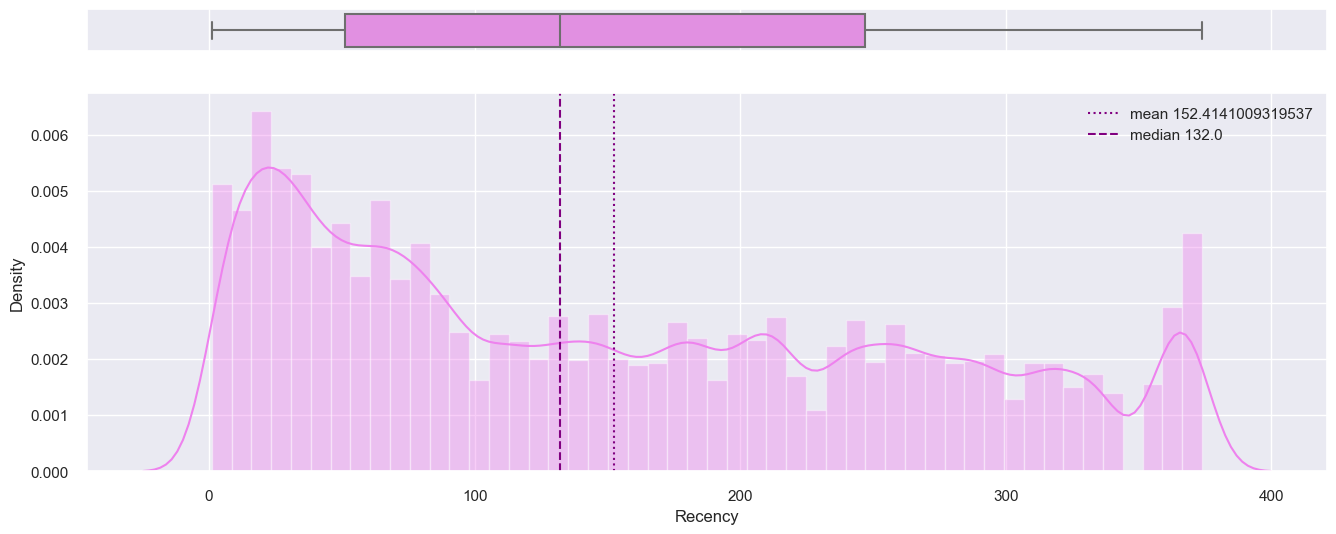

In [289]:
histBoxPlot(data.Recency)

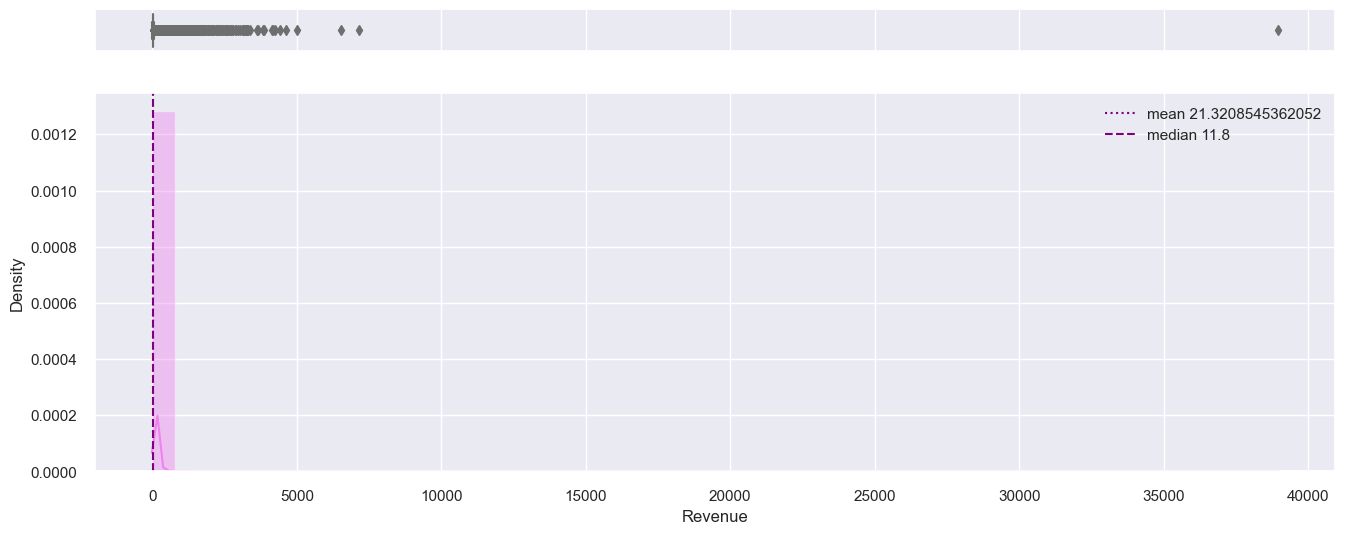

In [290]:
histBoxPlot(data.Revenue)

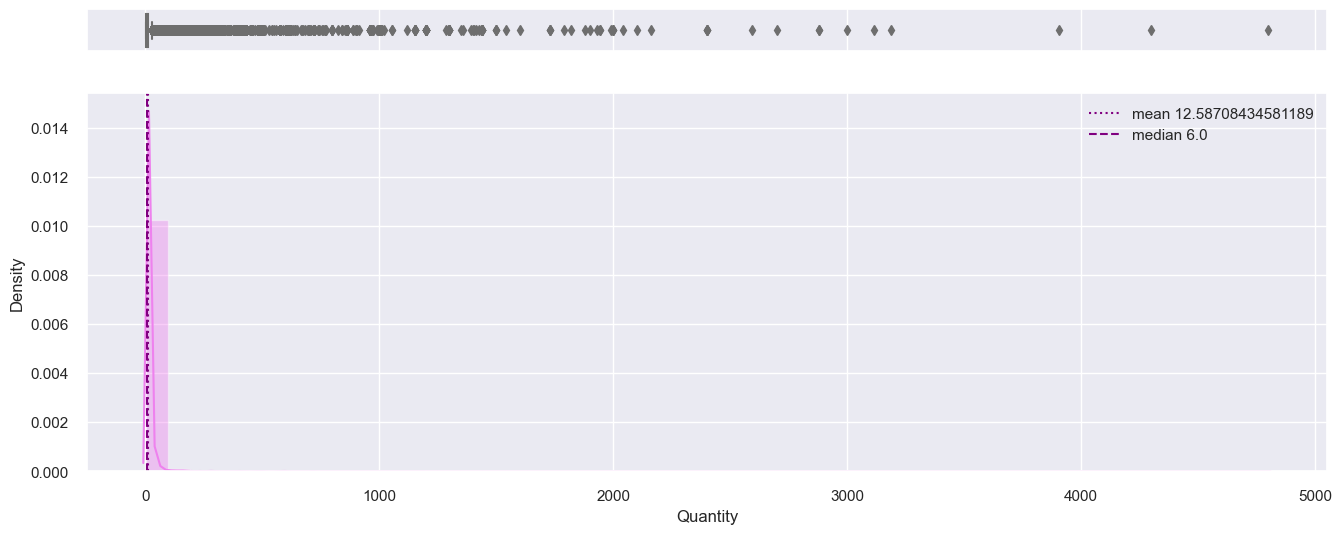

In [291]:
histBoxPlot(data.Quantity)

## **RFM Products Distribution**

In [292]:
productRecency = data.groupby('StockCode', as_index=False).Recency.min() #mencari recency paling minim
productFM = data.groupby('StockCode', as_index=False)[['Quantity', 'Revenue']].sum()
productRFM = pd.merge(productRecency, productFM, on='StockCode')
productRFM

,StockCode,Recency,Quantity,Revenue
0,10002,236,823,699.55
1,10080,19,291,114.41
2,10120,6,192,40.32
3,10123C,254,5,3.25
4,10124A,34,16,6.72
...,...,...,...,...
3640,90214U,5,12,3.48
3641,90214V,5,14,5.98
3642,90214W,5,12,3.48
3643,90214Y,4,61,18.65


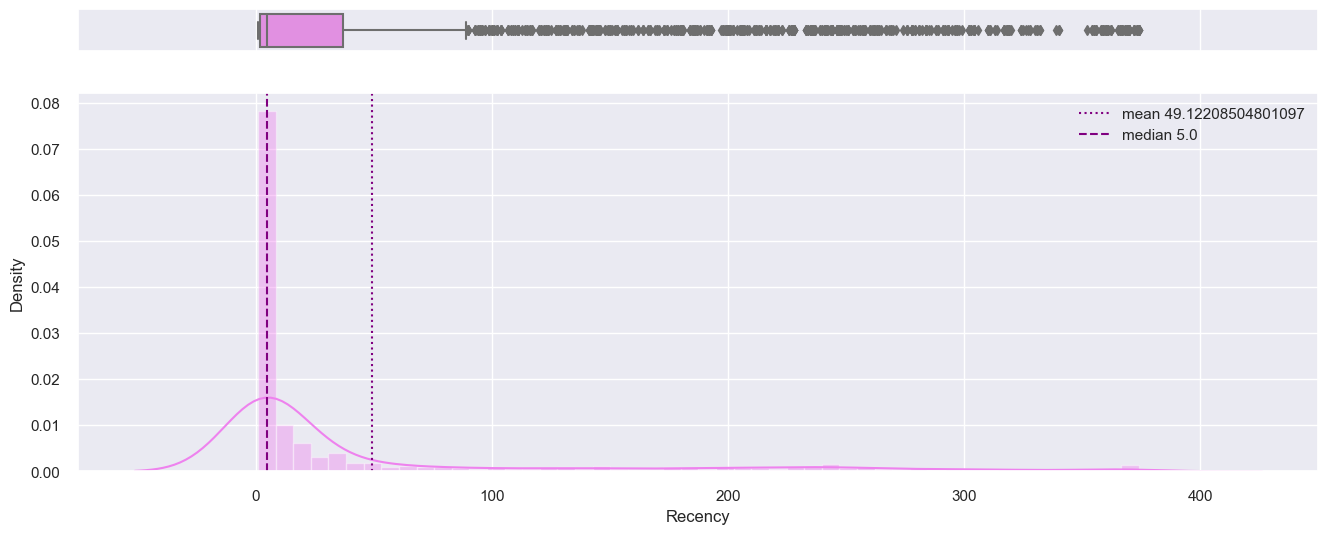

In [293]:
histBoxPlot(productRFM.Recency)

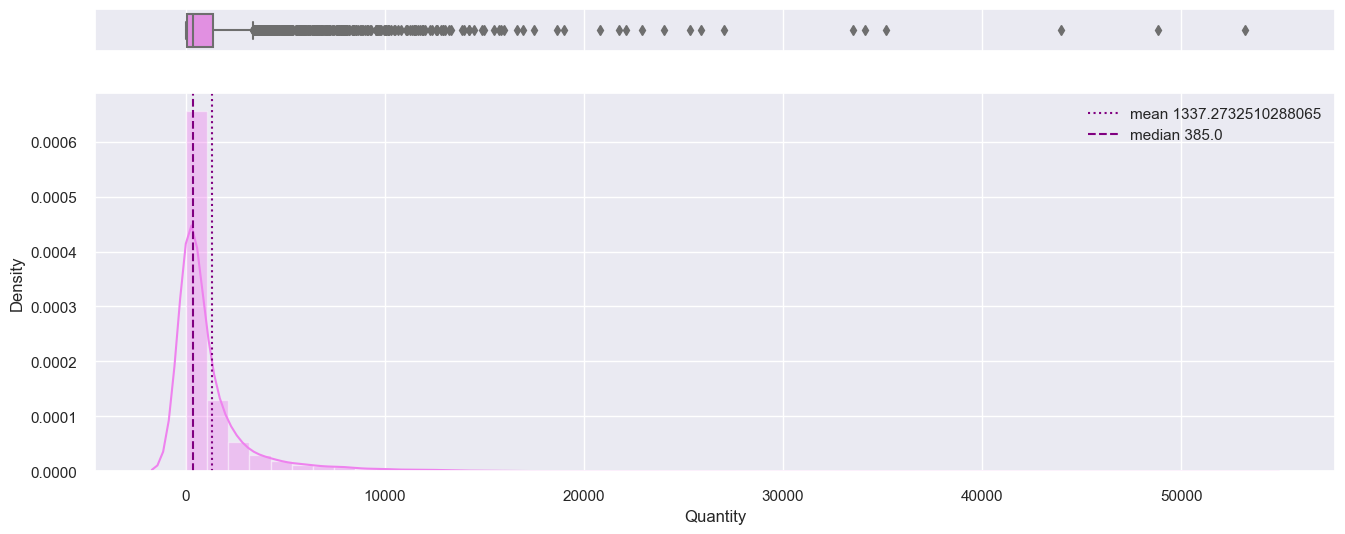

In [294]:
histBoxPlot(productRFM.Quantity)

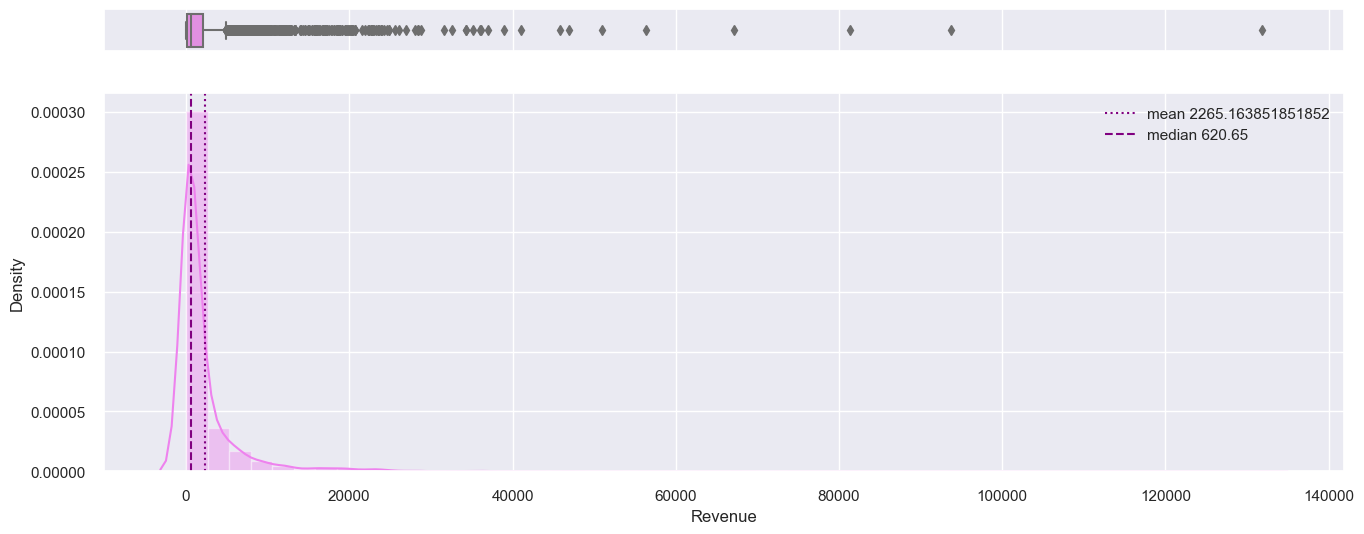

In [295]:
histBoxPlot(productRFM.Revenue)

## **RFM Feature Scaling & Transform**
Distribusi memiliki skew yang tinggi. Selanjutnya kita akan gunakan boxcox transformation. K-means adalah suatu algoritma unsupervised yang tujuannya untuk pengelompokkan data dengan kemiripan karateristik dari masing-masing atribut yang menggunakan euclidean distance sebagai penghitung jarak antar data yang kemudian dirata-ratakan untuk menghasilkan centroid.

perlu diingat, jika beurusan dengan euclidean distance dan "means" sebagai nilai tengah (centroid) maka data harus terdistribusi mendekati normal. Apabila tidak memenehui hal tersebut maka perlu dilakukan scaling atau pemilihan metode lain seperti k-median

https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

https://medium.com/analytics-vidhya/why-is-scaling-required-in-knn-and-k-means-8129e4d88ed7

https://mull-over-things.com/is-scaling-required-for-k-means-clustering/

Pada dasarnya RFM ini memiliki unit yang berbeda (waktu, jumlah, dan uang) sehingga pemilihan normalisasi harus tepat untuk data yang variatif dan juga skew tinggi

https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

https://www.statology.org/standardization-vs-normalization/

https://www.geeksforgeeks.org/normalization-vs-standardization/

In [296]:
from scipy.stats import boxcox

productRFM['RecencyBoxcox'], lamb = boxcox(productRFM['Recency'])
productRFM['QuantityBoxcox'], lamb = boxcox(productRFM['Quantity'])
productRFM['RevenueBoxcox'], lamb = boxcox(productRFM['Revenue'])

productRFM

,StockCode,Recency,Quantity,Revenue,RecencyBoxcox,QuantityBoxcox,RevenueBoxcox
0,10002,236,823,699.55,3.048357,9.732231,8.766659
1,10080,19,291,114.41,2.113175,7.744637,5.837432
2,10120,6,192,40.32,1.457097,7.008202,4.343963
3,10123C,254,5,3.25,3.068063,1.752788,1.239750
4,10124A,34,16,6.72,2.381674,3.216308,2.068093
...,...,...,...,...,...,...,...
3640,90214U,5,12,3.48,1.335724,2.837602,1.315556
3641,90214V,5,14,5.98,1.335724,3.039109,1.931585
3642,90214W,5,12,3.48,1.335724,2.837602,1.315556
3643,90214Y,4,61,18.65,1.179785,5.135833,3.322011


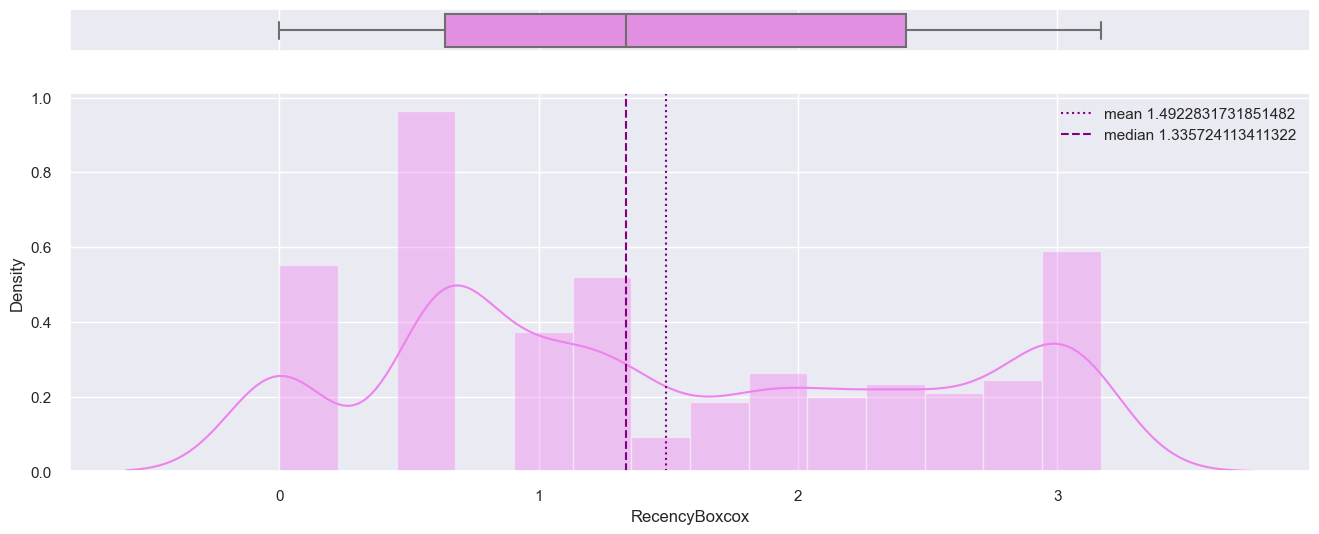

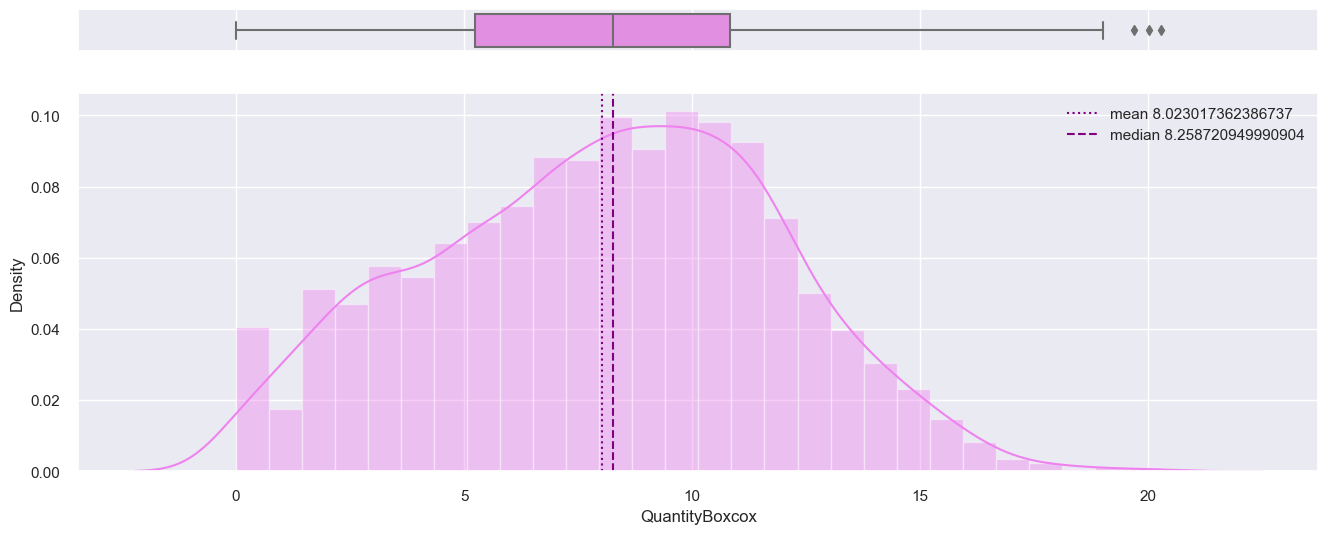

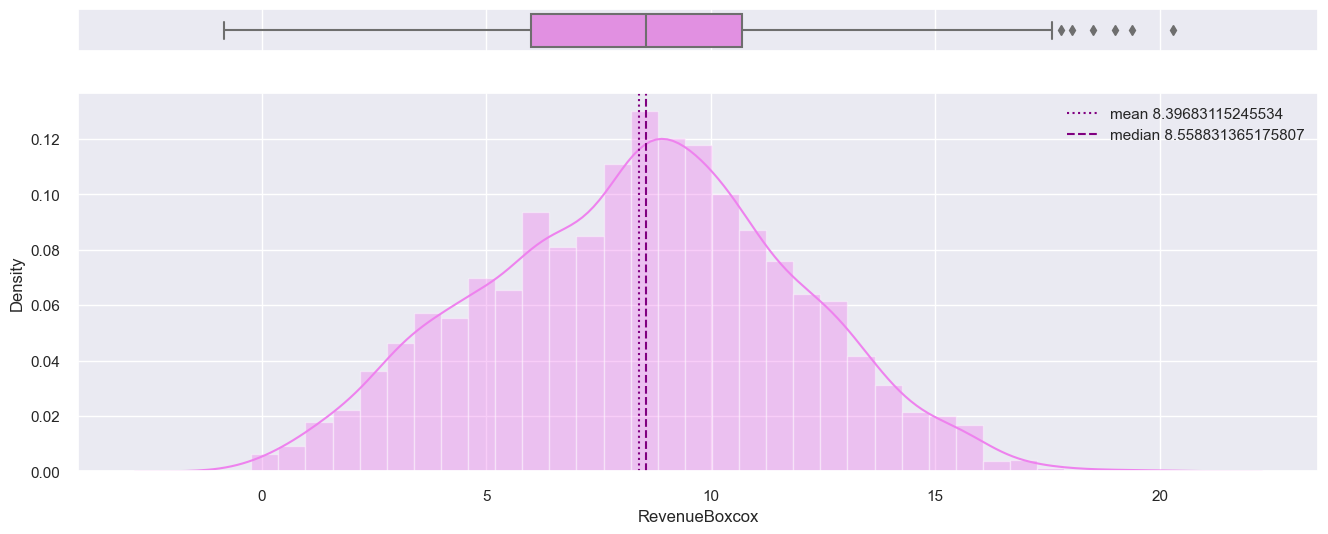

In [297]:
histBoxPlot(productRFM.RecencyBoxcox)
histBoxPlot(productRFM.QuantityBoxcox)
histBoxPlot(productRFM.RevenueBoxcox)

# **RFM Product Clustering K-Means**
Kita lihat bahwa hasil distribusi di atas memiliki perubahan distribusi yang signifikan dan dua kolom data hampir mendekati normal, sehingga kita sudah siap untuk ke tahap selanjutnya, yaitu clustering product. <br><br>
  - Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ). --> Elbow
  - silhouette algorithm is one of the many algorithms to determine the optimal number of clusters for an unsupervised learning technique.  A good model is highest value in silhoutte

In [298]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

X = productRFM[['RecencyBoxcox', 'QuantityBoxcox', 'RevenueBoxcox']]

inertia = []
clusters = []
silhScores = []
silhValue = []

for k in range(2, 11):
  model = KMeans(n_clusters=k, random_state=0)
  model.fit(X)
  labels = model.labels_ #model.labels_ == model.predict
  sampleSilhValue = silhouette_samples(X, labels)
  #
  silhScores.append(silhouette_score(X, model.labels_))
  inertia.append(model.inertia_)
  silhValue.append(sampleSilhValue)
  clusters.append(k)

result = pd.DataFrame(list(zip(clusters, inertia, silhScores)), columns =['Clusters', 'Inertia', 'SilhouetteScores'])
display(result)

,Clusters,Inertia,SilhouetteScores
0,2,37664.451864,0.504828
1,3,22554.069151,0.428957
2,4,16672.520089,0.381793
3,5,13613.910178,0.347272
4,6,12048.927078,0.304093
5,7,10713.657711,0.308204
6,8,9697.759158,0.292228
7,9,8843.158391,0.290812
8,10,8263.539961,0.281952


In [299]:
result['InertiaDiff'] = result.Inertia.shift(1) - result.Inertia
result['InertiaDiff2'] = result.InertiaDiff.shift(1) - result.InertiaDiff
result['SilhouetteScoresDiff'] = result.SilhouetteScores.shift(1) - result.SilhouetteScores
result['SilhouetteScoresDiff2'] = result.SilhouetteScoresDiff.shift(1) - result.SilhouetteScoresDiff
fig = px.line(result, x='Clusters', y='Inertia', markers=True)
display(result)
fig.show()

,Clusters,Inertia,SilhouetteScores,InertiaDiff,InertiaDiff2,SilhouetteScoresDiff,SilhouetteScoresDiff2
0,2,37664.451864,0.504828,NaN,NaN,NaN,NaN
1,3,22554.069151,0.428957,15110.382713,NaN,0.075871,NaN
2,4,16672.520089,0.381793,5881.549063,9228.833650,0.047164,0.028707
3,5,13613.910178,0.347272,3058.609911,2822.939152,0.034522,0.012642
4,6,12048.927078,0.304093,1564.983100,1493.626811,0.043179,-0.008658
5,7,10713.657711,0.308204,1335.269368,229.713732,-0.004112,0.047291
6,8,9697.759158,0.292228,1015.898553,319.370815,0.015977,-0.020088
7,9,8843.158391,0.290812,854.600767,161.297786,0.001415,0.014561
8,10,8263.539961,0.281952,579.618430,274.982336,0.008861,-0.007445


,RecencyBoxcox,QuantityBoxcox,RevenueBoxcox,cluster
0,3.048357,9.732231,8.766659,0
1,2.113175,7.744637,5.837432,3
2,1.457097,7.008202,4.343963,3
3,3.068063,1.752788,1.239750,1
4,2.381674,3.216308,2.068093,1
...,...,...,...,...
3640,1.335724,2.837602,1.315556,1
3641,1.335724,3.039109,1.931585,1
3642,1.335724,2.837602,1.315556,1
3643,1.179785,5.135833,3.322011,3


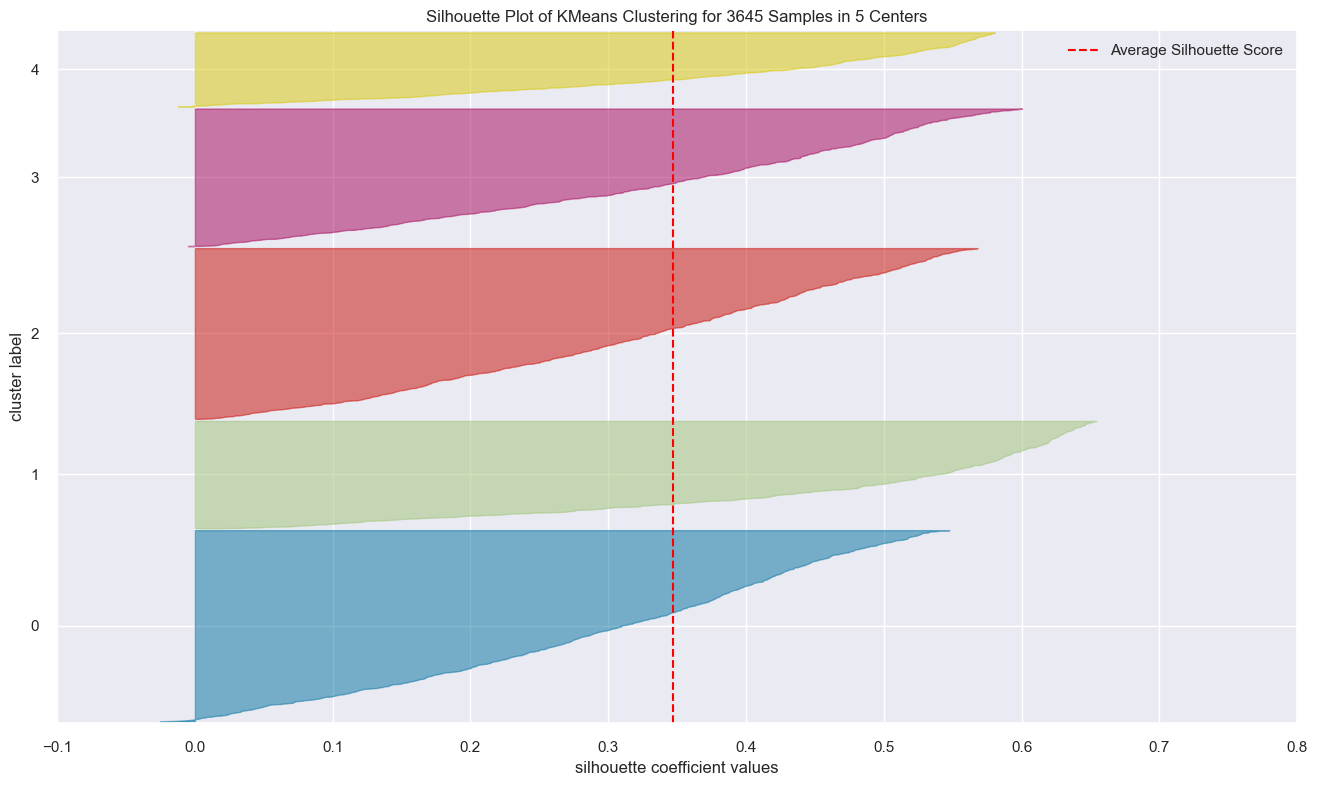

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 3645 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [300]:
from yellowbrick.cluster import SilhouetteVisualizer

X = productRFM[['RecencyBoxcox', 'QuantityBoxcox', 'RevenueBoxcox']]

model = KMeans(n_clusters = 5, random_state = 0)
model.fit(X)

X['cluster'] = model.labels_
X["cluster"] = X["cluster"].astype(str)
display(X)

visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X[['RecencyBoxcox', 'QuantityBoxcox', 'RevenueBoxcox']])        # Fit the data to the visualizer
visualizer.show()

## **Best K=5**


In [301]:
productRFM

,StockCode,Recency,Quantity,Revenue,RecencyBoxcox,QuantityBoxcox,RevenueBoxcox
0,10002,236,823,699.55,3.048357,9.732231,8.766659
1,10080,19,291,114.41,2.113175,7.744637,5.837432
2,10120,6,192,40.32,1.457097,7.008202,4.343963
3,10123C,254,5,3.25,3.068063,1.752788,1.239750
4,10124A,34,16,6.72,2.381674,3.216308,2.068093
...,...,...,...,...,...,...,...
3640,90214U,5,12,3.48,1.335724,2.837602,1.315556
3641,90214V,5,14,5.98,1.335724,3.039109,1.931585
3642,90214W,5,12,3.48,1.335724,2.837602,1.315556
3643,90214Y,4,61,18.65,1.179785,5.135833,3.322011


In [302]:
X = productRFM[['RecencyBoxcox', 'QuantityBoxcox', 'RevenueBoxcox']]

model = KMeans(n_clusters=5, random_state= 0)
model.fit(X)
productRFM['Cluster'] = model.predict(X)
display(productRFM.Cluster.value_counts())
display(productRFM)

0    1024
2     914
3     736
1     574
4     397
Name: Cluster, dtype: int64

,StockCode,Recency,Quantity,Revenue,RecencyBoxcox,QuantityBoxcox,RevenueBoxcox,Cluster
0,10002,236,823,699.55,3.048357,9.732231,8.766659,0
1,10080,19,291,114.41,2.113175,7.744637,5.837432,3
2,10120,6,192,40.32,1.457097,7.008202,4.343963,3
3,10123C,254,5,3.25,3.068063,1.752788,1.239750,1
4,10124A,34,16,6.72,2.381674,3.216308,2.068093,1
...,...,...,...,...,...,...,...,...
3640,90214U,5,12,3.48,1.335724,2.837602,1.315556,1
3641,90214V,5,14,5.98,1.335724,3.039109,1.931585,1
3642,90214W,5,12,3.48,1.335724,2.837602,1.315556,1
3643,90214Y,4,61,18.65,1.179785,5.135833,3.322011,3


## **Centroid**

In [303]:
centroid = model.cluster_centers_
display(centroid)
dfCentroid = pd.DataFrame(centroid, columns=['RecencyCentroid', 'QuantityCentroid', 'RevenueCentroid'])
dfCentroid.reset_index(inplace=True)
dfCentroid.rename(columns=dict(index='Cluster'), inplace=True)
dfCentroid

array([[ 1.40545065,  8.28228288,  8.65474993],
       [ 2.64152484,  2.15404482,  3.19750842],
       [ 0.88573348, 10.98735046, 10.81687661],
       [ 2.01105403,  5.34719017,  6.13812428],
       [ 0.48219982, 14.01313542, 13.89793112]])

,Cluster,RecencyCentroid,QuantityCentroid,RevenueCentroid
0,0,1.405451,8.282283,8.654750
1,1,2.641525,2.154045,3.197508
2,2,0.885733,10.987350,10.816877
3,3,2.011054,5.347190,6.138124
4,4,0.482200,14.013135,13.897931


In [306]:
productRFM = pd.merge(productRFM, dfCentroid, how='inner', on='Cluster')
productRFM

,StockCode,Recency,Quantity,Revenue,RecencyBoxcox,QuantityBoxcox,RevenueBoxcox,Cluster,RecencyCentroid,QuantityCentroid,RevenueCentroid
0,10002,236,823,699.55,3.048357,9.732231,8.766659,0,1.405451,8.282283,8.654750
1,15044A,5,421,1227.63,1.335724,8.426083,9.772203,0,1.405451,8.282283,8.654750
2,15044B,73,307,865.65,2.681958,7.841777,9.141921,0,1.405451,8.282283,8.654750
3,15044C,4,270,776.50,1.179785,7.609611,8.949632,0,1.405451,8.282283,8.654750
4,15058A,17,145,1081.95,2.057460,6.528773,9.542143,0,1.405451,8.282283,8.654750
...,...,...,...,...,...,...,...,...,...,...,...
3640,85099C,1,12390,22940.27,0.000000,16.057836,15.859537,4,0.482200,14.013135,13.897931
3641,85099F,2,15733,28752.93,0.638708,16.705837,16.395109,4,0.482200,14.013135,13.897931
3642,85123A,1,34126,93747.50,0.000000,18.921141,19.371885,4,0.482200,14.013135,13.897931
3643,85150,2,3894,8686.38,0.638708,13.137276,13.670263,4,0.482200,14.013135,13.897931


In [336]:
fig = px.scatter_3d(productRFM, x='RecencyBoxcox', y='QuantityBoxcox', z='RevenueBoxcox', color='Cluster')
fig.show()

In [334]:
fig=px.scatter(productRFM, x='QuantityBoxcox', y='RevenueBoxcox', color='Cluster')
fig.show()

In [345]:
clusterProductRFM = productRFM.groupby('Cluster', as_index=False).agg(
    RecencyMin=('Recency', np.min),
    RecencyMean=('Recency', np.mean),
    RecencyMax=('Recency', np.max),
    QuantityMin=('Quantity', np.min),
    QuantityMean=('Quantity', np.mean),
    QuantityMax=('Quantity', np.max),
    RevenueMin=('Revenue', np.min),
    RevenueMean=('Revenue', np.mean),
    RevenueMax=('Revenue', np.max),
    CountRFM=('Revenue', 'count'),
).sort_values(['RecencyMean', 'QuantityMean', 'RevenueMean'], ascending=[True, False, False])
clusterProductRFM

,Cluster,RecencyMin,RecencyMean,RecencyMax,QuantityMin,QuantityMean,QuantityMax,RevenueMin,RevenueMean,RevenueMax,CountRFM
4,4,1,3.007557,76,1261,6928.418136,53215,1397.04,12286.759824,131804.95,397
2,2,1,8.736324,269,243,1729.850109,8900,227.14,2621.755777,12648.34,914
0,0,1,30.258789,355,22,461.626953,1870,70.00,815.953750,6785.00,1024
3,3,1,67.092391,374,5,87.262228,504,11.76,179.679402,1530.00,736
1,1,1,155.933798,374,1,10.043554,52,0.42,25.458415,171.80,574


# **CONCLUSION**
*   **Cluster 4 -Best Product**

    Definition: Produk yang paling laris dan paling menghasilkan
    
    Action: Meningkatkan produksi dan ketersediaan produk

*   **Cluster 2 -Potential product**

    Definition: Produk yang cukup laris dan cukup menghasilkan
    
    Action: Meningkatkan campaign produk

*   **Cluster 3 -Treasure product**

    Definition: Produk yang cukup diminati dan cukup menghasilkan
    
    Action: Melakukan survey ke customer tentang produk ini serta memasarkan kembali produk ini

*   **Cluster 0 -At risk product**

    Definition: Produk yang kurang diminati dan kurang menghasilkan
    
    Action: Melakukan survey ke customer tentang produk ini dan meningkatkan mutu ketertarikan dari produk ini

*   **Cluster 1 -Unsold product**

    Definition: Produk yang sangat kurang laku dan sangat kurang menghasilkan
    
    Action: Melakukan survey ke customer tentang produk ini untuk pembelajaran pengembangan produk baru
